# Import and clean up of the control variables for my model

In [1]:
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

import seaborn as sns
import sidetable

In [2]:
##set a working directory
user = os.path.expanduser('~')
display(user)

os.makedirs(f'{user}/Desktop/thesis/', exist_ok=True)
path = os.chdir(f'{user}/Desktop/'+'thesis/control variables/')

'/Users/NatStrom'

In [3]:
#import the ingester extension functions
from ingester3.scratch import cache_manager
cache_manager()
from ingester3.extensions import *

import viewser
from viewser import Queryset, Column
from views_transformation_library import utilities

import ingester3
from ingester3.Country import Country

Clearing Secondary Cache...


In [4]:
def nullcounts(ser):
    return ser.isnull().sum()

def custom_describe(frame, func=[nullcounts, 'sum', 'mean', 'median', 'max'],
                    numeric_only=True, **kwargs):
    if numeric_only:
        frame = frame.select_dtypes(include=np.number)
    return frame.agg(func, **kwargs)

## 1. WDI indicator

In [5]:
data_age = pd.read_csv('pop0014.csv',skiprows= 4)
data_gdp = pd.read_csv('gdp_pcap.csv',skiprows=4)
data_xpd_gdp = pd.read_csv('expense_gdp.csv',skiprows=4)

In [6]:
display(data_age.columns)
display(data_xpd_gdp.columns)
display(data_gdp.columns)
display(data_age)
display(data_xpd_gdp)
display(data_gdp)

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021',
       'Unnamed: 66'],
      dtype='object')

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021',
       'Unnamed: 66'],
      dtype='object')

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021',
       'Unnamed: 66'],
      dtype='object')

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Unnamed: 66
0,Aruba,ABW,Population ages 0-14 (% of total population),SP.POP.0014.TO.ZS,43.131043,42.949419,42.852732,42.661157,42.359159,41.936664,...,19.348756,19.045505,18.799607,18.571721,18.334859,18.069771,17.767339,17.351022,16.799407,NaN
1,Africa Eastern and Southern,AFE,Population ages 0-14 (% of total population),SP.POP.0014.TO.ZS,44.200016,44.285569,44.381992,44.495098,44.609810,44.728859,...,42.933695,42.777344,42.594171,42.424004,42.255261,42.052786,41.832100,41.598115,41.362739,NaN
2,Afghanistan,AFG,Population ages 0-14 (% of total population),SP.POP.0014.TO.ZS,41.627186,41.695303,41.769167,41.885377,42.059389,42.314133,...,46.867621,46.231538,45.792106,45.520967,45.118616,44.708445,44.291352,43.807912,43.424543,NaN
3,Africa Western and Central,AFW,Population ages 0-14 (% of total population),SP.POP.0014.TO.ZS,41.322373,41.417194,41.529034,41.696118,41.944426,42.168576,...,44.266677,44.231527,44.155163,44.042022,43.893535,43.721214,43.531411,43.319347,43.095027,NaN
4,Angola,AGO,Population ages 0-14 (% of total population),SP.POP.0014.TO.ZS,42.236698,42.728464,43.256801,43.811211,44.416202,44.971958,...,45.756383,45.764164,45.759548,45.718586,45.641093,45.545945,45.425588,45.306602,45.179105,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,XKX,Population ages 0-14 (% of total population),SP.POP.0014.TO.ZS,43.933394,44.370671,44.687577,44.819432,44.700448,44.401636,...,26.690248,26.485297,25.964487,25.162776,24.434338,23.816523,23.247349,22.638645,22.001860,NaN
262,"Yemen, Rep.",YEM,Population ages 0-14 (% of total population),SP.POP.0014.TO.ZS,40.736166,40.747765,40.773133,40.875174,41.072802,41.368906,...,42.375582,42.027499,41.702829,41.407766,41.118413,40.820397,40.503437,40.188908,39.872107,NaN
263,South Africa,ZAF,Population ages 0-14 (% of total population),SP.POP.0014.TO.ZS,42.452166,42.301710,42.224522,42.123209,42.075672,42.097008,...,28.423750,28.394889,28.275352,28.365854,28.586096,28.681530,28.745269,28.739672,28.672962,NaN
264,Zambia,ZMB,Population ages 0-14 (% of total population),SP.POP.0014.TO.ZS,46.099247,46.303423,46.517781,46.773843,47.037066,47.253934,...,46.039495,45.789022,45.500445,45.189872,44.857299,44.496183,44.099904,43.680373,43.262363,NaN


,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Unnamed: 66
0,Aruba,ABW,Expense (% of GDP),GC.XPN.TOTL.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,Expense (% of GDP),GC.XPN.TOTL.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,25.148643,25.065357,23.987053,22.897400,25.408726,24.151671,25.776927,NaN,NaN,NaN
2,Afghanistan,AFG,Expense (% of GDP),GC.XPN.TOTL.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,42.093684,44.589299,37.022570,43.922766,39.220110,NaN,NaN,NaN,NaN,NaN
3,Africa Western and Central,AFW,Expense (% of GDP),GC.XPN.TOTL.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Angola,AGO,Expense (% of GDP),GC.XPN.TOTL.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,28.209237,27.967359,20.818832,17.511664,16.671137,15.607658,16.684952,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,XKX,Expense (% of GDP),GC.XPN.TOTL.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
262,"Yemen, Rep.",YEM,Expense (% of GDP),GC.XPN.TOTL.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
263,South Africa,ZAF,Expense (% of GDP),GC.XPN.TOTL.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,31.259191,31.905350,33.679779,32.189661,35.286226,34.088177,35.726235,38.196496,NaN,NaN
264,Zambia,ZMB,Expense (% of GDP),GC.XPN.TOTL.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,17.853306,20.256240,23.233788,22.408683,20.922076,20.110712,21.956163,25.410238,NaN,NaN


,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Unnamed: 66
0,Aruba,ABW,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,26515.678080,26942.307976,28421.386493,28451.273745,29326.708058,30220.594523,31650.760537,24487.863560,29342.100858,NaN
1,Africa Eastern and Southern,AFE,GDP per capita (current US$),NY.GDP.PCAP.CD,162.913034,162.551683,172.002460,199.189238,179.387799,198.230368,...,1730.394686,1719.183721,1538.552268,1443.692371,1628.586788,1564.734340,1512.270553,1363.540741,1549.772730,NaN
2,Afghanistan,AFG,GDP per capita (current US$),NY.GDP.PCAP.CD,62.369375,62.443703,60.950364,82.021738,85.511073,105.243196,...,651.987862,628.146804,592.476537,520.252064,530.149831,502.056771,500.522664,516.866552,368.754614,NaN
3,Africa Western and Central,AFW,GDP per capita (current US$),NY.GDP.PCAP.CD,106.976475,112.047561,117.730633,122.278715,130.599963,137.186142,...,2149.295219,2243.271464,1876.623483,1645.023767,1585.911930,1731.311792,1749.303317,1683.436391,1757.030626,NaN
4,Angola,AGO,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,5101.983876,5059.080441,3100.830685,1709.515534,2283.214233,2487.500996,2142.238757,1603.993477,1953.533757,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,XKX,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,3704.784221,3902.676013,3520.766449,3759.560246,4009.380987,4384.048892,4416.108358,4310.811183,5269.783901,NaN
262,"Yemen, Rep.",YEM,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,1497.747941,1557.601406,1488.416482,1069.817122,893.716573,701.714878,NaN,NaN,NaN,NaN
263,South Africa,ZAF,GDP per capita (current US$),NY.GDP.PCAP.CD,529.561923,543.042224,560.699395,601.599951,642.688431,681.131112,...,7441.230854,6965.137897,6204.929901,5735.066787,6734.475153,7048.522211,6688.787271,5741.643129,7055.044776,NaN
264,Zambia,ZMB,GDP per capita (current US$),NY.GDP.PCAP.CD,228.567399,216.274674,208.562685,209.453362,236.941713,296.022427,...,1840.320553,1724.576220,1307.909649,1249.923143,1495.752138,1475.204538,1268.120941,956.831364,1137.343633,NaN


In [7]:
#stack, filter and rename the columns
##rename
data_age = data_age.rename(columns= {'Country Code':'iso'})
data_xpd_gdp = data_xpd_gdp.rename(columns= {'Country Code':'iso'})
data_gdp = data_gdp.rename(columns= {'Country Code':'iso'})
##filter the needed columns
data_age = data_age.drop(columns=['Country Name','Indicator Name', 'Indicator Code','Unnamed: 66'])
data_xpd_gdp = data_xpd_gdp.drop(columns=['Country Name','Indicator Name', 'Indicator Code','Unnamed: 66'])
data_gdp = data_gdp.drop(columns=['Country Name','Indicator Name', 'Indicator Code','Unnamed: 66'])
##stack the individual year columns
data_age = data_age.melt(id_vars='iso',var_name='year_id',value_name='age0014_value')
data_xpd_gdp = data_xpd_gdp.melt(id_vars='iso',var_name='year_id',value_name='xpd_gdp_value')
data_gdp = data_gdp.melt(id_vars='iso',var_name='year_id',value_name='gdp_pcap_value')

display(data_age)
display(data_xpd_gdp)
display(data_gdp)

,iso,year_id,age0014_value
0,ABW,1960,43.131043
1,AFE,1960,44.200016
2,AFG,1960,41.627186
3,AFW,1960,41.322373
4,AGO,1960,42.236698
...,...,...,...
16487,XKX,2021,22.001860
16488,YEM,2021,39.872107
16489,ZAF,2021,28.672962
16490,ZMB,2021,43.262363


,iso,year_id,xpd_gdp_value
0,ABW,1960,NaN
1,AFE,1960,NaN
2,AFG,1960,NaN
3,AFW,1960,NaN
4,AGO,1960,NaN
...,...,...,...
16487,XKX,2021,NaN
16488,YEM,2021,NaN
16489,ZAF,2021,NaN
16490,ZMB,2021,NaN


,iso,year_id,gdp_pcap_value
0,ABW,1960,NaN
1,AFE,1960,162.913034
2,AFG,1960,62.369375
3,AFW,1960,106.976475
4,AGO,1960,NaN
...,...,...,...
16487,XKX,2021,5269.783901
16488,YEM,2021,NaN
16489,ZAF,2021,7055.044776
16490,ZMB,2021,1137.343633


In [8]:
data_gdp['year_id'] = data_gdp['year_id'].astype(str).astype(int)
data_age['year_id'] = data_age['year_id'].astype(str).astype(int)
data_xpd_gdp['year_id'] = data_xpd_gdp['year_id'].astype(str).astype(int)

In [9]:
#merge them together
data_wdi = pd.merge(data_age,data_gdp, how="outer", on=["iso", "year_id"])
data_wdi = pd.merge(data_wdi,data_xpd_gdp, how="outer", on=["iso", "year_id"])
display(data_wdi)

,iso,year_id,age0014_value,gdp_pcap_value,xpd_gdp_value
0,ABW,1960,43.131043,NaN,NaN
1,AFE,1960,44.200016,162.913034,NaN
2,AFG,1960,41.627186,62.369375,NaN
3,AFW,1960,41.322373,106.976475,NaN
4,AGO,1960,42.236698,NaN,NaN
...,...,...,...,...,...
16487,XKX,2021,22.001860,5269.783901,NaN
16488,YEM,2021,39.872107,NaN,NaN
16489,ZAF,2021,28.672962,7055.044776,NaN
16490,ZMB,2021,43.262363,1137.343633,NaN


In [10]:
## only years from 1980 onwards
data_wdi = data_wdi.loc[data_wdi['year_id'] >= 1990]
data_wdi = data_wdi.loc[data_wdi['year_id'] <= 2019]

In [11]:
data_wdi = data_wdi.loc[data_wdi['iso'].isin(['AGO', 'BDI', 'BEN', 'BFA', 'BWA', 'CAF', 'CIV', 'CMR', 'COD',
       'COG', 'COM', 'CPV', 'DJI', 'ERI', 'ETH', 'GAB', 'GHA', 'GIN',
       'GMB', 'GNB', 'GNQ', 'KEN', 'LBR', 'LSO', 'MDG', 'MLI', 'MOZ',
       'MRT', 'MWI', 'NAM', 'NER', 'NGA', 'RWA', 'SDN', 'SEN', 'SLE',
       'SOM', 'SSD', 'STP', 'SWZ', 'TCD', 'TGO', 'TZA', 'UGA', 'ZAF',
       'ZMB', 'ZWE'])]

In [12]:
data_wdi

,iso,year_id,age0014_value,gdp_pcap_value,xpd_gdp_value
7984,AGO,1990,46.586185,949.286381,NaN
7996,BDI,1990,48.475941,206.444928,NaN
7998,BEN,1990,45.603014,381.805039,NaN
7999,BFA,1990,46.868240,339.631808,NaN
8013,BWA,1990,45.435804,2825.673142,26.681603
...,...,...,...,...,...
15940,TZA,2019,44.146193,1052.021729,NaN
15941,UGA,2019,46.200731,823.138950,13.515074
15957,ZAF,2019,28.745269,6688.787271,35.726235
15958,ZMB,2019,44.099904,1268.120941,21.956163


In [13]:
#test for missingness
#getting the % of missing values in each column
values_list = list()
cols_list = list() #creating empty lists

for col in data_wdi.columns:
    pct_missing= np.mean(data_wdi[col].isnull())*100
    cols_list.append(col)
    values_list.append(pct_missing)

pct_missing_df =pd.DataFrame()
pct_missing_df["col"] = cols_list
pct_missing_df["pct_missing"] = values_list
pct_missing_df

,col,pct_missing
0,iso,0.000000
1,year_id,0.000000
2,age0014_value,0.000000
3,gdp_pcap_value,5.390071
4,xpd_gdp_value,68.014184


In [14]:
custom_describe(data_wdi)

,year_id,age0014_value,gdp_pcap_value,xpd_gdp_value
nullcounts,0.0,0.000000,7.600000e+01,959.000000
sum,2826345.0,61639.906576,1.806825e+06,8540.774129
mean,2004.5,43.716246,1.354442e+03,18.937415
median,2004.5,44.328912,6.822840e+02,17.085500
max,2019.0,51.180881,1.984972e+04,52.181411


In [15]:
display(data_wdi.stb.freq(['iso','year_id'],value='age0014_value'))
display(data_wdi.stb.freq(['iso','year_id'],value='gdp_pcap_value'))
display(data_wdi.stb.freq(['iso','year_id'],value='xpd_gdp_value'))

,iso,year_id,age0014_value,percent,cumulative_age0014_value,cumulative_percent
0,RWA,1995,51.180881,0.083032,51.180881,0.083032
1,BDI,1994,51.040288,0.082804,102.221169,0.165836
2,BDI,1993,50.864115,0.082518,153.085285,0.248354
3,UGA,2002,50.556055,0.082018,203.641340,0.330373
4,UGA,2001,50.546401,0.082003,254.187740,0.412375
...,...,...,...,...,...,...
1405,ZAF,2016,28.365854,0.046019,61528.064823,99.818556
1406,ZAF,2015,28.275352,0.045872,61556.340175,99.864428
1407,CPV,2017,28.239821,0.045814,61584.579996,99.910242
1408,CPV,2018,27.864860,0.045206,61612.444856,99.955448


,iso,year_id,gdp_pcap_value,percent,cumulative_gdp_pcap_value,cumulative_percent
0,GNQ,2008,19849.717767,1.098597,1.984972e+04,1.098597
1,GNQ,2012,18756.426423,1.038088,3.860614e+04,2.136684
2,GNQ,2011,18659.417054,1.032719,5.726556e+04,3.169403
3,GNQ,2013,17644.595162,0.976553,7.491016e+04,4.145955
4,GNQ,2014,16804.925948,0.930080,9.171508e+04,5.076036
...,...,...,...,...,...,...
1329,MWI,1994,116.642918,0.006456,1.806388e+06,99.975840
1330,BDI,2003,114.367007,0.006330,1.806503e+06,99.982170
1331,RWA,1994,111.937304,0.006195,1.806615e+06,99.988365
1332,ETH,2002,110.460875,0.006114,1.806725e+06,99.994479


,iso,year_id,xpd_gdp_value,percent,cumulative_xpd_gdp_value,cumulative_percent
0,LSO,2009,52.181411,0.610968,52.181411,0.610968
1,LSO,2008,46.492018,0.544354,98.673429,1.155322
2,LSO,2013,42.708435,0.500053,141.381864,1.655375
3,LSO,2010,42.541593,0.498100,183.923457,2.153475
4,LSO,2007,41.462449,0.485465,225.385906,2.638940
...,...,...,...,...,...,...
446,GNQ,2006,3.686132,0.043159,8537.347550,99.959880
447,GNQ,2007,3.426025,0.040114,8540.773575,99.999994
448,SOM,2019,0.000185,0.000002,8540.773760,99.999996
449,SOM,2017,0.000185,0.000002,8540.773944,99.999998


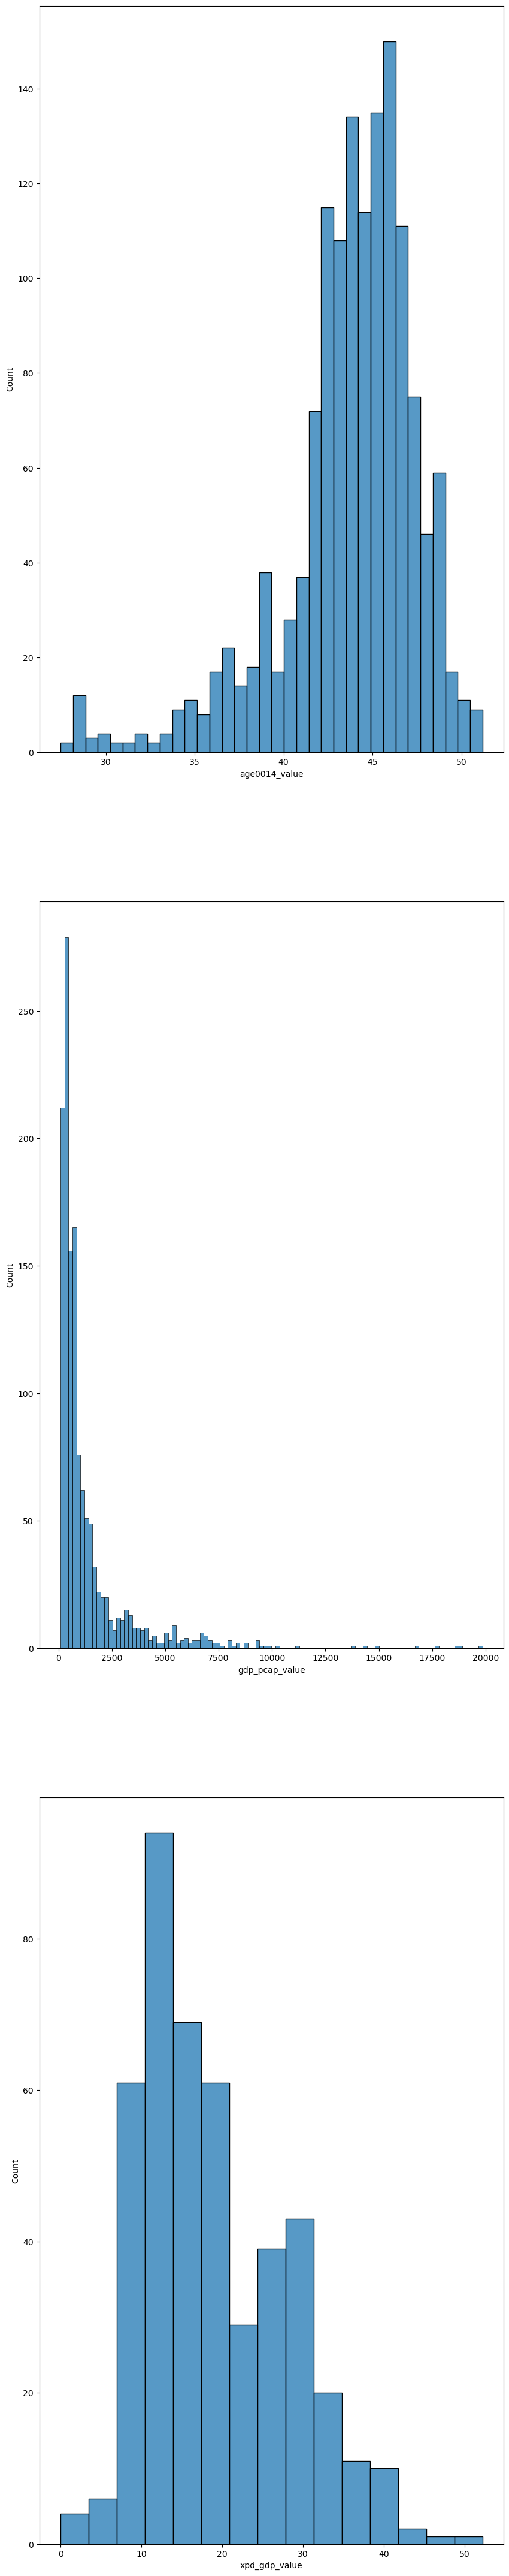

In [16]:
#get a histogram
#create histograms for all mean variables
figure, axes = plt.subplots(3,1,figsize=(10,55))
sns.histplot(data_wdi['age0014_value'],ax=axes[0])
sns.histplot(data_wdi['gdp_pcap_value'],ax=axes[1])
sns.histplot(data_wdi['xpd_gdp_value'],ax=axes[2])
plt.savefig('wdi1.png')

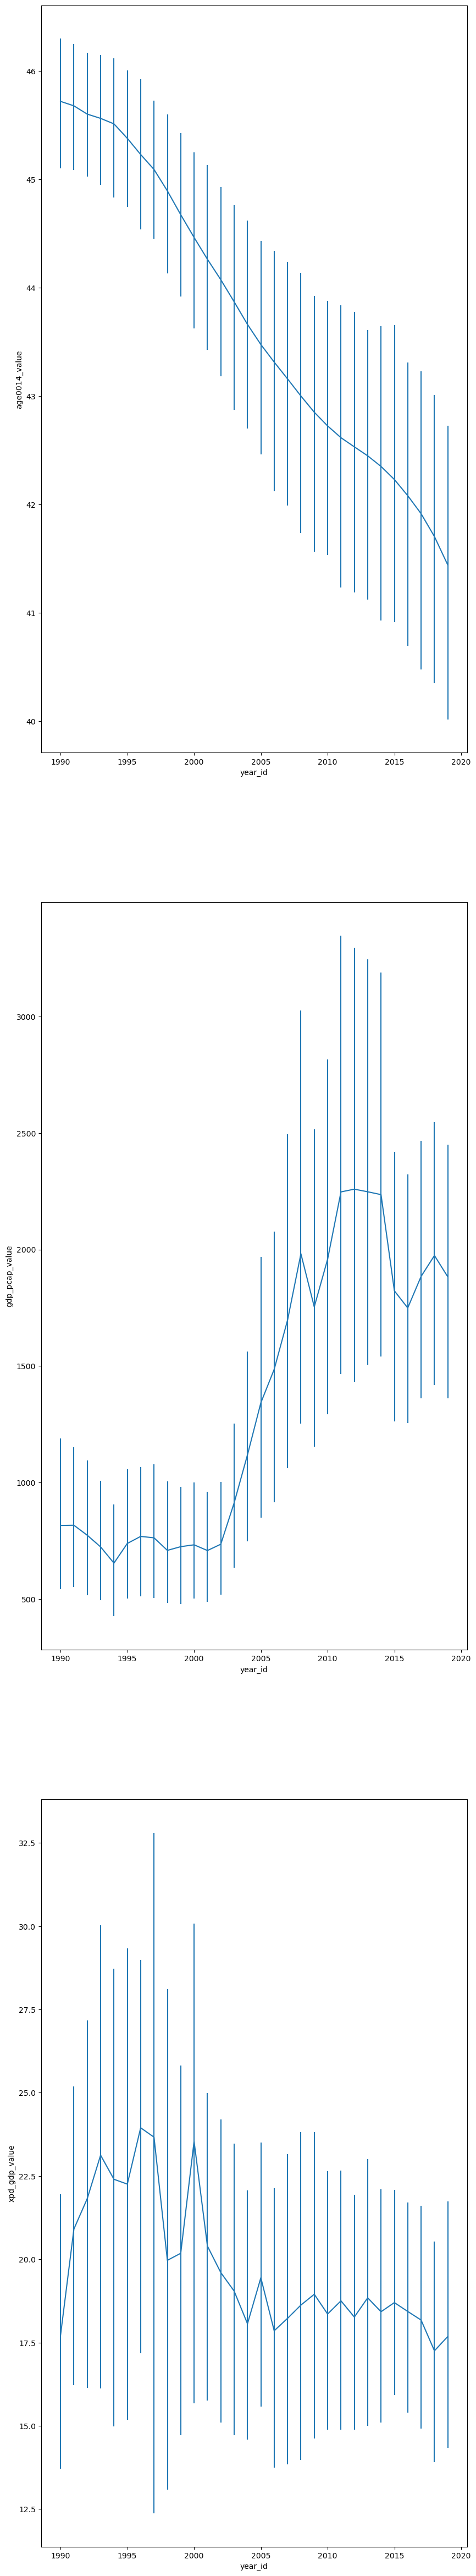

In [17]:
#create trendlines
figure, axes = plt.subplots(3,1,figsize=(10,60))

sns.lineplot(x='year_id',y='age0014_value',data=data_wdi,err_style='bars',ax=axes[0])
sns.lineplot(x='year_id',y='gdp_pcap_value',data=data_wdi,err_style='bars',ax=axes[1])
sns.lineplot(x='year_id',y='xpd_gdp_value',data=data_wdi,err_style='bars',ax=axes[2])

plt.savefig('wdi2.png')

In [18]:
#logtransform the wdi_gdp variable
data_wdi['gdp_log'] = np.log(data_wdi['gdp_pcap_value'])
data_wdi

,iso,year_id,age0014_value,gdp_pcap_value,xpd_gdp_value,gdp_log
7984,AGO,1990,46.586185,949.286381,NaN,6.855711
7996,BDI,1990,48.475941,206.444928,NaN,5.330034
7998,BEN,1990,45.603014,381.805039,NaN,5.944910
7999,BFA,1990,46.868240,339.631808,NaN,5.827862
8013,BWA,1990,45.435804,2825.673142,26.681603,7.946502
...,...,...,...,...,...,...
15940,TZA,2019,44.146193,1052.021729,NaN,6.958469
15941,UGA,2019,46.200731,823.138950,13.515074,6.713125
15957,ZAF,2019,28.745269,6688.787271,35.726235,8.808188
15958,ZMB,2019,44.099904,1268.120941,21.956163,7.145292


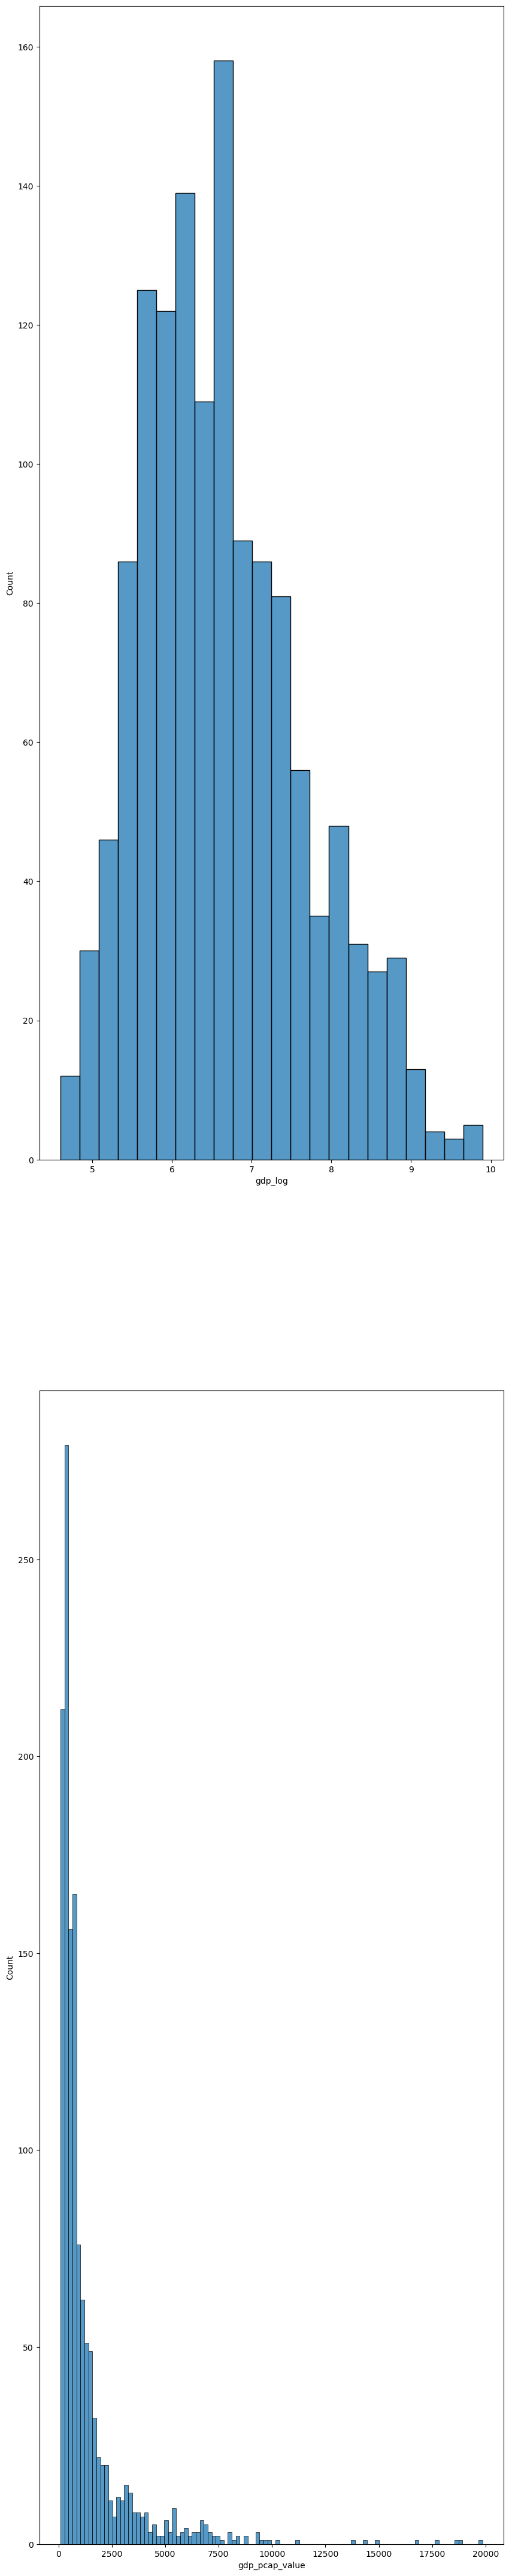

In [19]:
#compare skewed and logtransformed gdp
figure, axes = plt.subplots(2,1,figsize=(10,55))
sns.histplot(data_wdi['gdp_log'],ax=axes[0])
sns.histplot(data_wdi['gdp_pcap_value'],ax=axes[1])
plt.savefig('wdi_log.png')

In [20]:
#save to csv
data_wdi.to_csv('data_wdi.csv')

## 2. Development assistance to health

In [23]:
#load data (already cleaned up)
data_dah = pd.read_csv('DAH.csv')
display(data_dah)

,Unnamed: 0,country,year_id,iso,ihme_dah_elim_ch,ihme_dah_prelim_est,ihme_dah_total_aid,ihme_dah_rmh_aid,ihme_dah_nch_aid,ihme_dah_hiv_aid,ihme_dah_mal_aid,ihme_dah_tb_aid,ihme_dah_ncd_aid,ihme_dah_oid_aid,ihme_dah_unalloc_aid,ihme_dah_other_aid
0,0,Afghanistan,1990,AFG,0,0,64005.0,0.0,0.0,0.0,0.0,0.0,0.0,193.0,0.0,63812.0
1,1,Afghanistan,1991,AFG,0,0,44222.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,44131.0
2,2,Afghanistan,1992,AFG,1,0,18503.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17253.0
3,3,Afghanistan,1993,AFG,1,0,13531.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13521.0
4,4,Afghanistan,1994,AFG,1,0,2105.0,155.0,340.0,2.0,0.0,0.0,4.0,118.0,0.0,1353.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4512,4512,Zimbabwe,2014,ZWE,87,0,366808.0,55318.0,46085.0,212254.0,34890.0,8450.0,573.0,799.0,0.0,6066.0
4513,4513,Zimbabwe,2015,ZWE,80,0,491662.0,53583.0,86006.0,294420.0,33059.0,13915.0,1239.0,1720.0,0.0,4014.0
4514,4514,Zimbabwe,2016,ZWE,89,0,385735.0,34939.0,52061.0,223305.0,38019.0,14030.0,524.0,1343.0,0.0,19902.0
4515,4515,Zimbabwe,2017,ZWE,75,27,436510.0,25122.0,122226.0,206333.0,39998.0,21187.0,2762.0,1907.0,0.0,14835.0


In [26]:
data_dah = data_dah.loc[data_dah['iso'].isin(['AGO', 'BDI', 'BEN', 'BFA', 'BWA', 'CAF', 'CIV', 'CMR', 'COD',
       'COG', 'COM', 'CPV', 'DJI', 'ERI', 'ETH', 'GAB', 'GHA', 'GIN',
       'GMB', 'GNB', 'GNQ', 'KEN', 'LBR', 'LSO', 'MDG', 'MLI', 'MOZ',
       'MRT', 'MWI', 'NAM', 'NER', 'NGA', 'RWA', 'SDN', 'SEN', 'SLE',
       'SOM', 'SSD', 'STP', 'SWZ', 'TCD', 'TGO', 'TZA', 'UGA', 'ZAF',
       'ZMB', 'ZWE'])]

In [27]:
custom_describe(data_dah)

,Unnamed: 0,year_id,ihme_dah_elim_ch,ihme_dah_prelim_est,ihme_dah_total_aid,ihme_dah_rmh_aid,ihme_dah_nch_aid,ihme_dah_hiv_aid,ihme_dah_mal_aid,ihme_dah_tb_aid,ihme_dah_ncd_aid,ihme_dah_oid_aid,ihme_dah_unalloc_aid,ihme_dah_other_aid
nullcounts,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.00000,0.000000e+00,0.000000e+00,0.000000e+00
sum,2.959353e+06,2.715368e+06,54699.000000,2553.000000,1.776006e+08,1.770215e+07,2.586232e+07,6.321090e+07,1.830821e+07,5.194622e+06,850443.00000,7.268924e+06,1.146965e+06,2.352402e+07
mean,2.184024e+03,2.003962e+03,40.368266,1.884133,1.310706e+05,1.306432e+04,1.908658e+04,4.665011e+04,1.351159e+04,3.833669e+03,627.63321,5.364520e+03,8.464686e+02,1.736090e+04
median,2.109000e+03,2.004000e+03,19.000000,0.000000,4.441800e+04,3.045000e+03,3.096000e+03,6.750000e+03,7.240000e+02,2.710000e+02,46.00000,1.049000e+03,0.000000e+00,8.065000e+03
max,4.516000e+03,2.018000e+03,131.000000,36.000000,1.577709e+06,2.352610e+05,5.422260e+05,6.637850e+05,3.060600e+05,1.671940e+05,32493.00000,4.547380e+05,1.682550e+05,2.503840e+05


In [28]:
data_dah.columns
data_dah = data_dah.filter(['country', 'year_id', 'iso','ihme_dah_total_aid'])

In [29]:
#check for missingness
#getting the % of missing values in each column
values_list = list()
cols_list = list() #creating empty lists

for col in data_dah.columns:
    pct_missing= np.mean(data_dah[col].isnull())*100
    cols_list.append(col)
    values_list.append(pct_missing)

pct_missing_df =pd.DataFrame()
pct_missing_df["col"] = cols_list
pct_missing_df["pct_missing"] = values_list
pct_missing_df

,col,pct_missing
0,country,0.0
1,year_id,0.0
2,iso,0.0
3,ihme_dah_total_aid,0.0


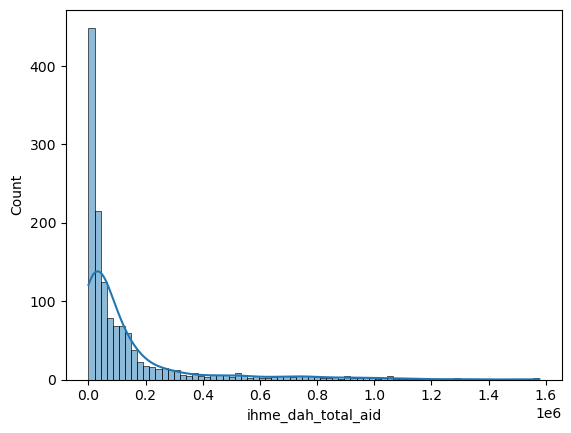

In [30]:
#create histograms for all mean variables

sns.histplot(data_dah['ihme_dah_total_aid'],kde= True)

plt.savefig('dah1.png')

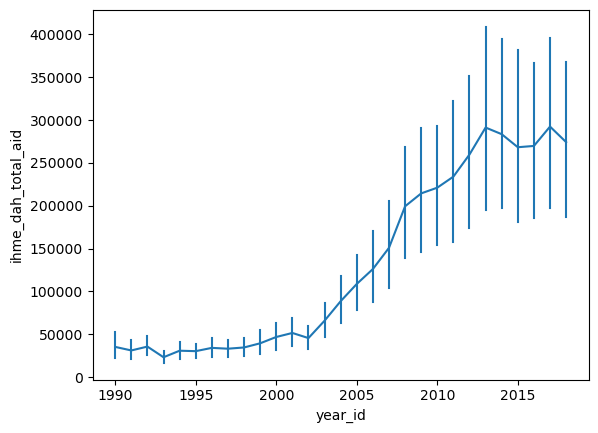

In [31]:
#create trendlines
sns.lineplot(x='year_id',y='ihme_dah_total_aid',data=data_dah,err_style='bars')

plt.savefig('dah2.png')

,country,year_id,iso,ihme_dah_total_aid,dah_total_log
87,Angola,1990,AGO,21733.0,9.986587
88,Angola,1991,AGO,29906.0,10.305814
89,Angola,1992,AGO,26620.0,10.189418
90,Angola,1993,AGO,14315.0,9.569063
91,Angola,1994,AGO,11775.0,9.373734
...,...,...,...,...,...
4512,Zimbabwe,2014,ZWE,366808.0,12.812594
4513,Zimbabwe,2015,ZWE,491662.0,13.105547
4514,Zimbabwe,2016,ZWE,385735.0,12.862906
4515,Zimbabwe,2017,ZWE,436510.0,12.986567


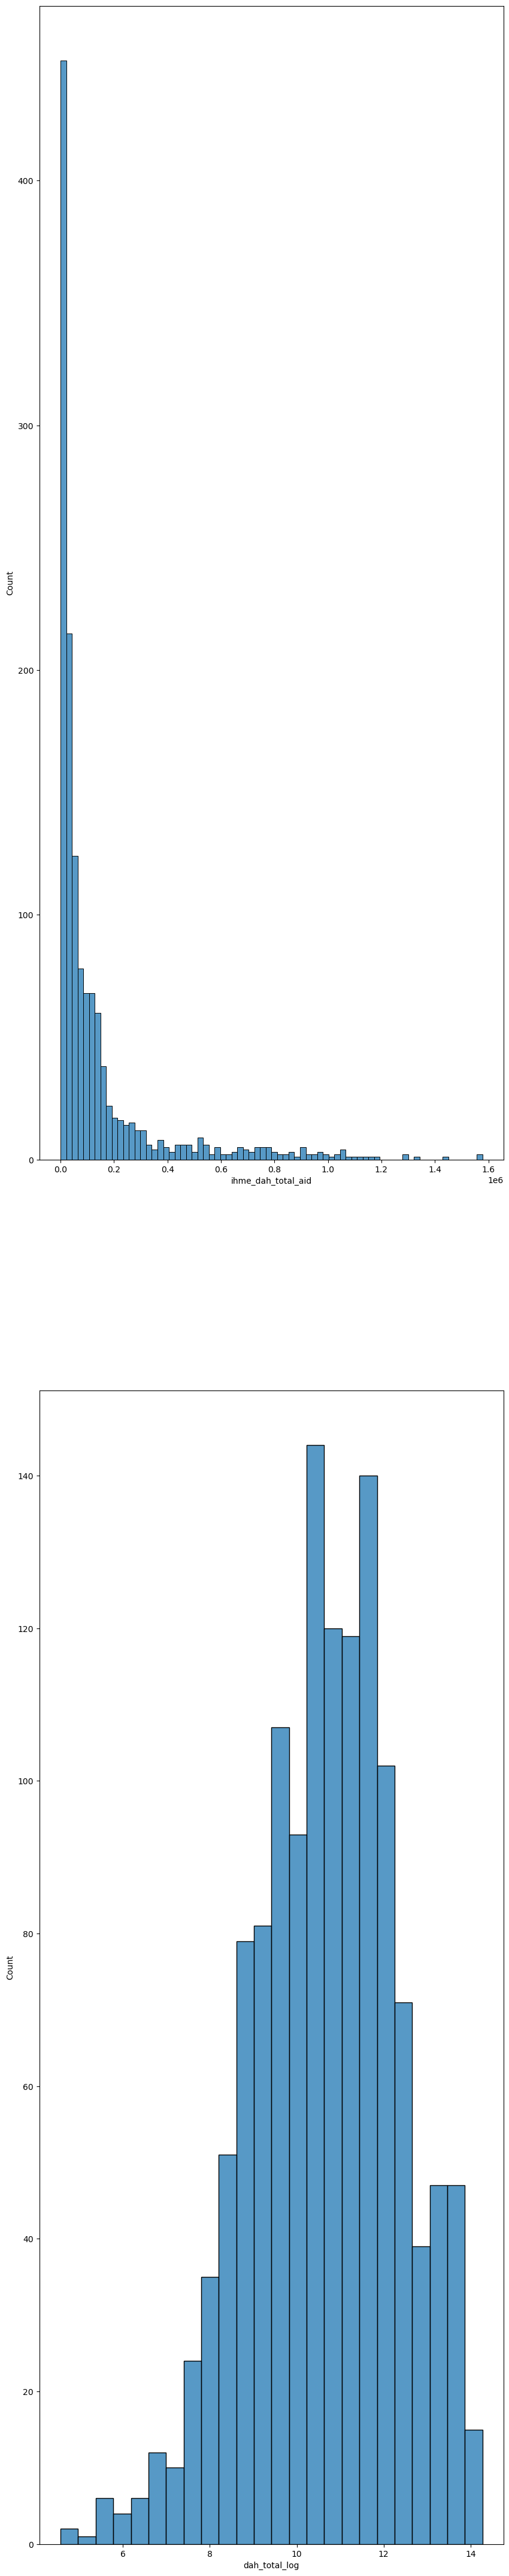

In [32]:
#logtransform the aid
data_dah['dah_total_log'] = np.log(data_dah['ihme_dah_total_aid'])
display(data_dah)

figure, axes = plt.subplots(2,1,figsize=(10,55))
sns.histplot(data_dah['ihme_dah_total_aid'],ax=axes[0])
sns.histplot(data_dah['dah_total_log'],ax=axes[1])

plt.savefig('dah_log.png')

In [33]:
custom_describe(data_dah)

,year_id,ihme_dah_total_aid,dah_total_log
nullcounts,0.000000e+00,0.000000e+00,0.000000
sum,2.715368e+06,1.776006e+08,14418.400218
mean,2.003962e+03,1.310706e+05,10.640886
median,2.004000e+03,4.441800e+04,10.701400
max,2.018000e+03,1.577709e+06,14.271484


In [34]:
data_dah.to_csv('data_dah.csv')

## 3.  WASH, ND-GAIN country indicators

In [35]:
#load data
data_water = pd.read_csv('access_drink.csv')
data_sani = pd.read_csv('access_sani.csv')
display(data_water, data_sani)

,ISO3,Name,1995,1996,1997,1998,1999,2000,2001,2002,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,AFG,Afghanistan,10.927531,10.927531,10.927531,10.927531,10.927531,10.927531,10.938792,11.725373,...,19.966875,20.818832,21.671018,22.523437,23.376206,24.229208,25.083892,25.940512,26.798956,27.588956
1,ALB,Albania,49.138321,49.138321,49.138321,49.138321,49.138321,49.138321,49.081199,48.984765,...,64.327401,66.380852,68.459832,70.563260,70.591971,70.616508,70.636942,70.653350,70.665854,70.674537
2,DZA,Algeria,70.078517,70.078517,70.078517,70.078517,70.078517,70.078517,70.642182,71.191853,...,75.469921,75.867626,76.250145,75.971789,75.534372,75.068531,74.574965,73.879833,73.139746,72.381456
3,AND,Andorra,90.640001,90.640001,90.640001,90.640001,90.640001,90.640001,90.639999,90.640002,...,90.639998,90.640003,90.639996,90.640001,90.639998,90.639996,90.639999,90.640001,90.640003,90.640003
4,AGO,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,VEN,"Venezuela, Bolivarian Republic o",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
188,VNM,Viet Nam,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
189,YEM,Yemen,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
190,ZMB,Zambia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,ISO3,Name,1995,1996,1997,1998,1999,2000,2001,2002,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,AFG,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ALB,Albania,40.237416,40.237416,40.237416,40.237416,40.237416,40.237416,40.520895,40.808202,...,44.733594,45.154840,45.561574,45.954062,46.333013,46.698890,47.052290,47.393845,47.577141,47.691082
2,DZA,Algeria,21.514720,21.514720,21.514720,21.514720,21.514720,21.514720,21.351868,21.187954,...,19.677090,19.445413,19.214180,18.983353,18.753132,18.523473,18.294577,18.066395,17.839063,17.612590
3,AND,Andorra,14.604036,14.604036,14.604036,14.604036,14.604036,14.604036,21.788660,28.973285,...,93.634905,100.000004,99.999995,100.000001,99.999998,99.999995,99.999999,100.000001,100.000004,100.000004
4,AGO,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,VEN,"Venezuela, Bolivarian Republic o",21.810225,21.810225,21.810225,21.810225,21.810225,21.810225,21.810225,21.810225,...,21.152327,21.365023,21.577719,21.790415,22.003111,22.215806,22.428502,22.641198,22.853894,23.066590
188,VNM,Viet Nam,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
189,YEM,Yemen,24.771589,24.771589,24.771589,24.771589,24.771589,24.771589,24.890676,25.011545,...,19.724307,19.088029,18.448936,17.806700,17.431739,17.724536,18.011676,18.292967,18.568462,18.837979
190,ZMB,Zambia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
#stack, filter and rename the columns
##rename
data_water = data_water.rename(columns= {'ISO3':'iso'})
data_sani = data_sani.rename(columns= {'ISO3':'iso'})
##filter the needed columns
data_sani = data_sani.drop(columns=['Name'])
data_water = data_water.drop(columns=['Name'])
##stack the individual year columns
data_water = data_water.melt(id_vars='iso',var_name='year_id',value_name='access_drinkwater_index')
data_sani = data_sani.melt(id_vars='iso',var_name='year_id',value_name='access_sani_index')

In [37]:
display(data_sani.dtypes, data_water.dtypes)
data_water['year_id'] = data_water['year_id'].astype(str).astype(int)
data_sani['year_id'] = data_sani['year_id'].astype(str).astype(int)

iso                   object
year_id               object
access_sani_index    float64
dtype: object

iso                         object
year_id                     object
access_drinkwater_index    float64
dtype: object

In [38]:
data_wash = pd.merge(data_water,data_sani, how="outer", on=["iso", "year_id"])

In [39]:
#group by country-year & only filter iso for  SSA)
data_wash = data_wash.loc[data_wash['iso'].isin(['AGO', 'BDI', 'BEN', 'BFA', 'BWA', 'CAF', 'CIV', 'CMR', 'COD',
       'COG', 'COM', 'CPV', 'DJI', 'ERI', 'ETH', 'GAB', 'GHA', 'GIN',
       'GMB', 'GNB', 'GNQ', 'KEN', 'LBR', 'LSO', 'MDG', 'MLI', 'MOZ',
       'MRT', 'MWI', 'NAM', 'NER', 'NGA', 'RWA', 'SDN', 'SEN', 'SLE',
       'SOM', 'SSD', 'STP', 'SWZ', 'TCD', 'TGO', 'TZA', 'UGA', 'ZAF',
       'ZMB', 'ZWE'])]
data_wash = data_wash.groupby(['iso','year_id']).sum().reset_index()
display(data_wash)

,iso,year_id,access_drinkwater_index,access_sani_index
0,AGO,1995,0.000000,0.000000
1,AGO,1996,0.000000,0.000000
2,AGO,1997,0.000000,0.000000
3,AGO,1998,0.000000,0.000000
4,AGO,1999,0.000000,0.000000
...,...,...,...,...
1191,ZWE,2016,30.183683,26.877909
1192,ZWE,2017,29.997683,26.576824
1193,ZWE,2018,29.827913,26.272073
1194,ZWE,2019,29.673569,25.963544


In [40]:
#test for missingness
#getting the % of missing values in each column
values_list = list()
cols_list = list() #creating empty lists

for col in data_wash.columns:
    pct_missing= np.mean(data_wash[col].isnull())*100
    cols_list.append(col)
    values_list.append(pct_missing)

pct_missing_df =pd.DataFrame()
pct_missing_df["col"] = cols_list
pct_missing_df["pct_missing"] = values_list
pct_missing_df

,col,pct_missing
0,iso,0.0
1,year_id,0.0
2,access_drinkwater_index,0.0
3,access_sani_index,0.0


In [41]:
custom_describe(data_wash)

,year_id,access_drinkwater_index,access_sani_index
nullcounts,0.0,0.000000,0.000000
sum,2400970.0,8415.358893,9074.974003
mean,2007.5,7.036253,7.587771
median,2007.5,0.000000,0.000000
max,2020.0,45.896896,47.621688


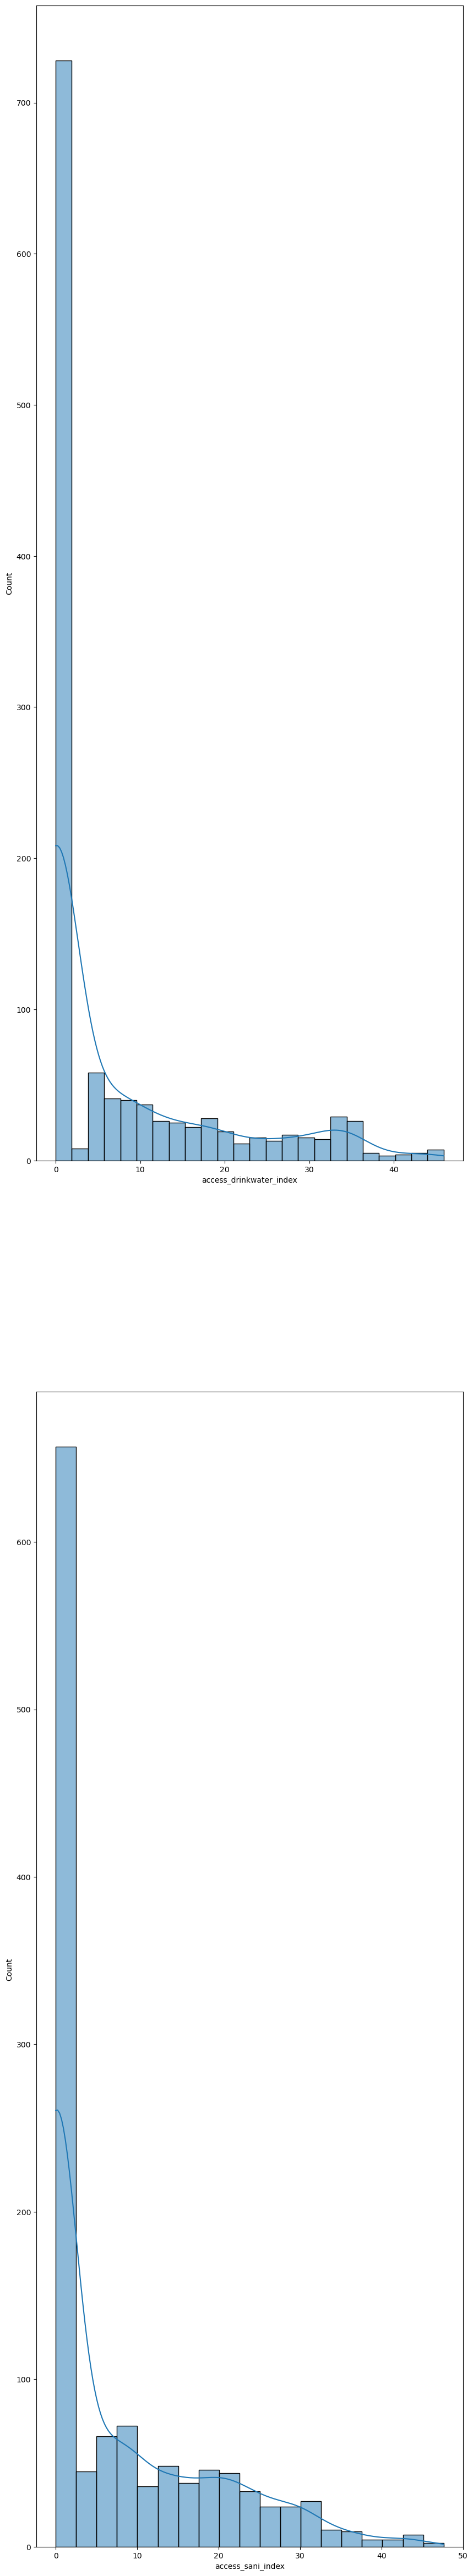

In [42]:
figure, axes = plt.subplots(2,1,figsize=(10,60))
sns.histplot(data_wash['access_drinkwater_index'],kde = True,ax=axes[0])
sns.histplot(data_wash['access_sani_index'],kde = True,ax=axes[1])

plt.savefig('wash1.png')

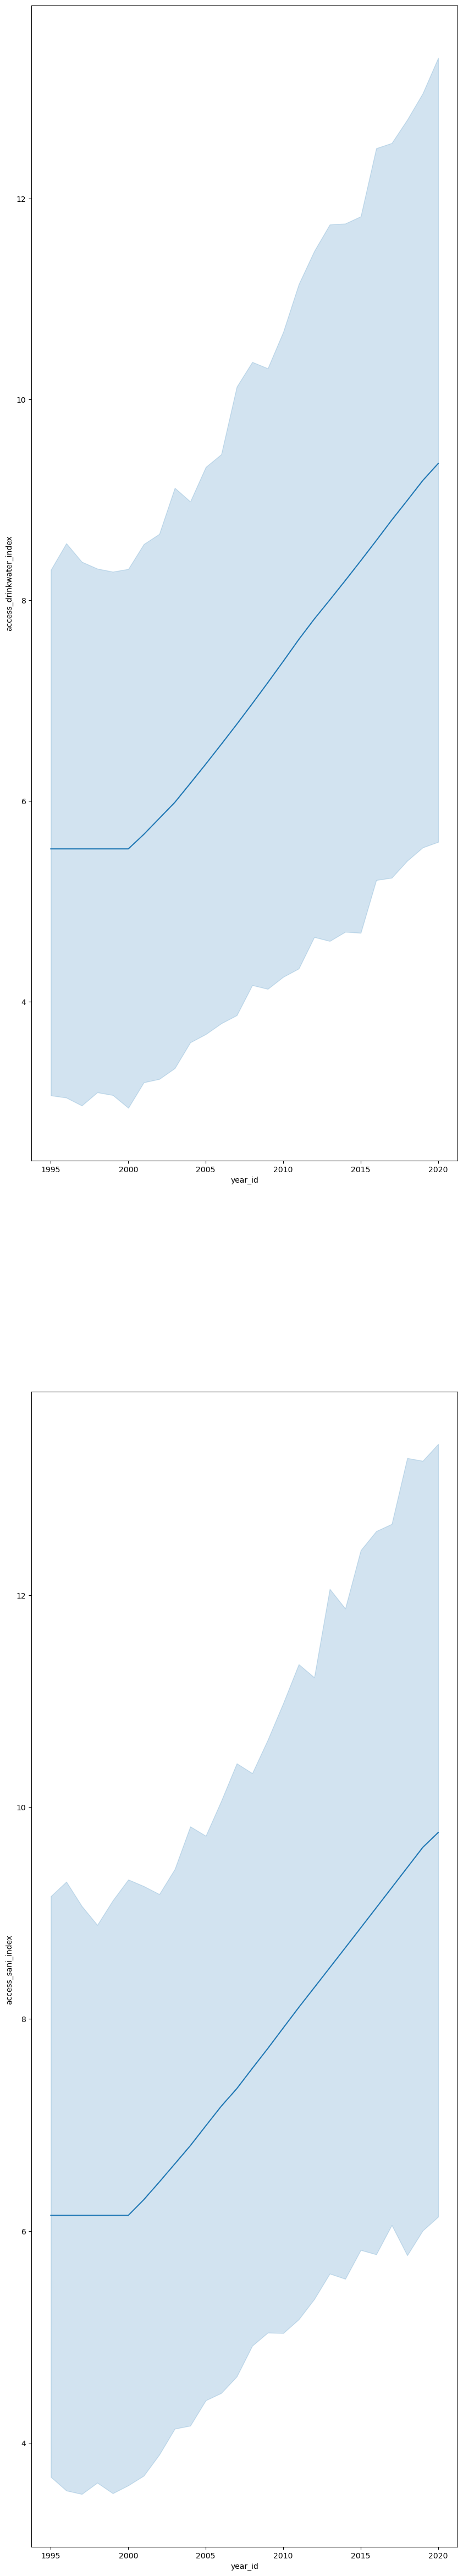

In [43]:
#create trendlines
figure, axes = plt.subplots(2,1,figsize=(10,60))
sns.lineplot(x='year_id',y='access_drinkwater_index',data=data_wash,ax=axes[0])
sns.lineplot(x='year_id',y='access_sani_index',data=data_wash,ax=axes[1])

plt.savefig('wash2.png')

In [44]:
data_wash.to_csv('data_wash.csv')

## 4. Exposure and Vulnerability

In [45]:
def report(df):
    print()
    print(f"A dataset with {len(df.columns)} columns, with "
          f"data between t {min(df.index.get_level_values(0))} "
          f"and {max(df.index.get_level_values(0))}. "
          f"({len(np.unique(df.index.get_level_values(1)))} units)"
          )
    return

In [46]:
#look if the data is already in the views system
!viewser tables list


  > Tables
  ---------------------------------------------------------------------------------------
  | name                                    | path                                    |
  |:----------------------------------------|:----------------------------------------|
  | values_actor_pgm_actor_qlag2_tlag24     | values_actor_pgm_actor_qlag2_tlag24     |
  | values_actor_pgm_actor                  | values_actor_pgm_actor                  |
  | values_actor_pgm_actor_qlag1            | values_actor_pgm_actor_qlag1            |
  | values_actor_pgm_actor_qlag1_persistent | values_actor_pgm_actor_qlag1_persistent |
  | values_actor_pgm_actor_qlag1_tlag24     | values_actor_pgm_actor_qlag1_tlag24     |
  | values_actor_pgm_actor_qlag1_tlag6      | values_actor_pgm_actor_qlag1_tlag6      |
  | values_actor_pgm_actor_qlag2_persistent | values_actor_pgm_actor_qlag2_persistent |
  | values_actor_pgm_actor_persistent       | values_actor_pgm_actor_persistent       |
  | vdem_v12_healt

In [47]:
!viewser tables show gdis_pgy


  > Gdis_pgy
  -------------------------------------------------------------------------------
  | name                                | path                                |
  |:------------------------------------|:------------------------------------|
  | priogrid_year_id                    | priogrid_year_id                    |
  | gids_disastertype_join              | gids_disastertype_join              |
  | gids_total_deaths_mean              | gids_total_deaths_mean              |
  | gids_total_affected_mean            | gids_total_affected_mean            |
  | gids_no_injured_mean                | gids_no_injured_mean                |
  | gids_disasterno_nunique             | gids_disasterno_nunique             |
  | gids_disasterno_count               | gids_disasterno_count               |
  | gids_distype_drought_sum            | gids_distype_drought_sum            |
  | gids_distype_earthquake_sum         | gids_distype_earthquake_sum         |
  | gids_distype_extreme

In [48]:
#define the preliminers t (1990 till 2019) and c_ids
#transform pgy into cy
data_disaster = (Queryset("gdis_pgy", "priogrid_year")
                 .with_column(Column("gdis_count", from_table="gdis_pgy", from_column="gids_disasterno_count"))
                # .agggregate('sum')
                 .with_column(Column("gdis_nunique", from_table="gdis_pgy", from_column="gids_disasterno_nunique"))
                # .agggregate('sum')
                 .with_column(Column("gdis_type", from_table="gdis_pgy", from_column="gids_disastertype_join")))


data_disaster = data_disaster.publish().fetch()

data_disaster

 .      o      O      O      o       .      o      O  

gdis_count  gdis_nunique gdis_type
year_id priogrid_gid                                    
1980    49182                0.0           0.0          
        49183                0.0           0.0          
        49184                0.0           0.0          
        49185                0.0           0.0          
        49186                0.0           0.0          
...                          ...           ...       ...
2050    249340               NaN           NaN      None
        249341               NaN           NaN      None
        249342               NaN           NaN      None
        249343               NaN           NaN      None
        249344               NaN           NaN      None

[4602078 rows x 3 columns]

In [49]:
data_disaster= data_disaster.reset_index()
data_disaster = data_disaster.rename(columns={'priogrid_gid':'pg_id'})
data_disaster = data_disaster[data_disaster['year_id'] <=2019] 
data_disaster = data_disaster[data_disaster['year_id'] >=1990] 
data_disaster = data_disaster[(data_disaster.pgy.lon.between(-10,40)) & (data_disaster.pgy.lat.between(-35,+35))]
#filter in africa
data_disaster

Clearing Secondary Cache...


,year_id,pg_id,gdis_count,gdis_nunique,gdis_type
649526,1990,79599,0.0,0.0,
649527,1990,79600,0.0,0.0,
649528,1990,79601,0.0,0.0,
649610,1990,80317,1.0,1.0,drought
649611,1990,80318,1.0,1.0,drought
...,...,...,...,...,...
2558136,2019,179716,NaN,NaN,None
2558137,2019,179717,NaN,NaN,None
2558138,2019,179718,NaN,NaN,None
2558139,2019,179719,NaN,NaN,None


In [50]:
# Look how easy it is to convert a PGY df to a CY dataframe. Ready for aggregation!
data_disaster['c_id'] = data_disaster.pgy.c_id
data_disaster

Clearing Secondary Cache...


,year_id,pg_id,gdis_count,gdis_nunique,gdis_type,c_id
649526,1990,79599,0.0,0.0,,192
649527,1990,79600,0.0,0.0,,192
649528,1990,79601,0.0,0.0,,163
649610,1990,80317,1.0,1.0,drought,192
649611,1990,80318,1.0,1.0,drought,163
...,...,...,...,...,...,...
2558136,2019,179716,NaN,NaN,None,220
2558137,2019,179717,NaN,NaN,None,220
2558138,2019,179718,NaN,NaN,None,220
2558139,2019,179719,NaN,NaN,None,220


In [51]:
#get the iso numbers
data_disaster['iso'] = data_disaster.c.isoab
data_disaster

/Users/NatStrom/opt/miniconda3/envs/viewser/lib/python3.9/site-packages/ingester3/scratch.py:31: UserWarning: No database connection! Will try to use cache for read-only ops as much as I can
  warnings.warn("No database connection! Will try to use cache for read-only ops as much as I can")


,year_id,pg_id,gdis_count,gdis_nunique,gdis_type,c_id,iso
649526,1990,79599,0.0,0.0,,192,ZAF
649527,1990,79600,0.0,0.0,,192,ZAF
649528,1990,79601,0.0,0.0,,163,ZAF
649610,1990,80317,1.0,1.0,drought,192,ZAF
649611,1990,80318,1.0,1.0,drought,163,ZAF
...,...,...,...,...,...,...,...
2558136,2019,179716,NaN,NaN,None,220,SYR
2558137,2019,179717,NaN,NaN,None,220,SYR
2558138,2019,179718,NaN,NaN,None,220,SYR
2558139,2019,179719,NaN,NaN,None,220,SYR


In [52]:
inspect = data_disaster.loc[data_disaster.iso.isna()]
display(inspect)

,year_id,pg_id,gdis_count,gdis_nunique,gdis_type,c_id,iso


In [53]:
data_disaster = data_disaster.loc[data_disaster['iso'].isin(['AGO', 'BDI', 'BEN', 'BFA', 'BWA', 'CAF', 'CIV', 'CMR', 'COD',
       'COG', 'COM', 'CPV', 'DJI', 'ERI', 'ETH', 'GAB', 'GHA', 'GIN',
       'GMB', 'GNB', 'GNQ', 'KEN', 'LBR', 'LSO', 'MDG', 'MLI', 'MOZ',
       'MRT', 'MWI', 'NAM', 'NER', 'NGA', 'RWA', 'SDN', 'SEN', 'SLE',
       'SOM', 'SSD', 'STP', 'SWZ', 'TCD', 'TGO', 'TZA', 'UGA', 'ZAF',
       'ZMB', 'ZWE'])]
data_disaster = data_disaster.groupby(['iso','year_id']).sum().reset_index()
display(data_disaster)

/var/folders/3l/pgxm2f9j3bbgbjcj2pyxl__00000gp/T/ipykernel_2594/2898911301.py:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_disaster = data_disaster.groupby(['iso','year_id']).sum().reset_index()


,iso,year_id,pg_id,gdis_count,gdis_nunique,c_id
0,AGO,1990,48689148,13.0,13.0,71775
1,AGO,1991,48689148,0.0,0.0,71775
2,AGO,1992,48689148,11.0,11.0,71775
3,AGO,1993,48689148,0.0,0.0,71775
4,AGO,1994,48689148,0.0,0.0,71775
...,...,...,...,...,...,...
1111,ZWE,2015,13811629,59.0,57.0,21330
1112,ZWE,2016,13811629,42.0,38.0,21330
1113,ZWE,2017,13811629,261.0,117.0,21330
1114,ZWE,2018,13811629,19.0,19.0,21330


In [54]:
#clean up columns
data_disaster = data_disaster.drop(columns={'c_id'})

/Users/NatStrom/opt/miniconda3/envs/viewser/lib/python3.9/site-packages/seaborn/distributions.py:2142: UserWarning: `displot` is a figure-level function and does not accept the ax= parameter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)
/Users/NatStrom/opt/miniconda3/envs/viewser/lib/python3.9/site-packages/seaborn/distributions.py:2142: UserWarning: `displot` is a figure-level function and does not accept the ax= parameter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)


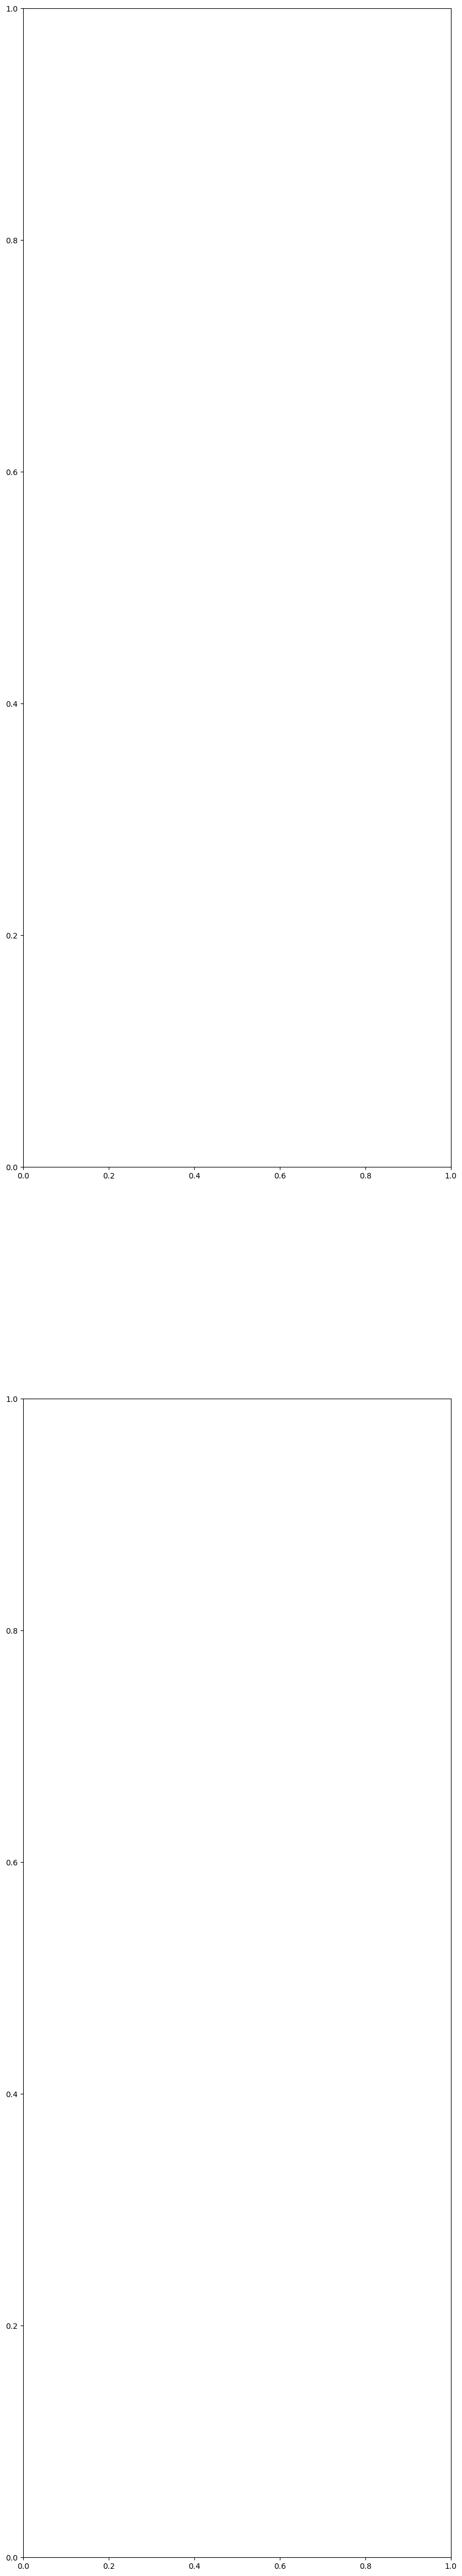

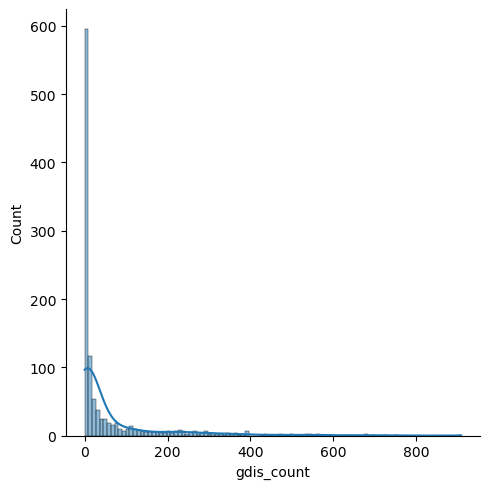

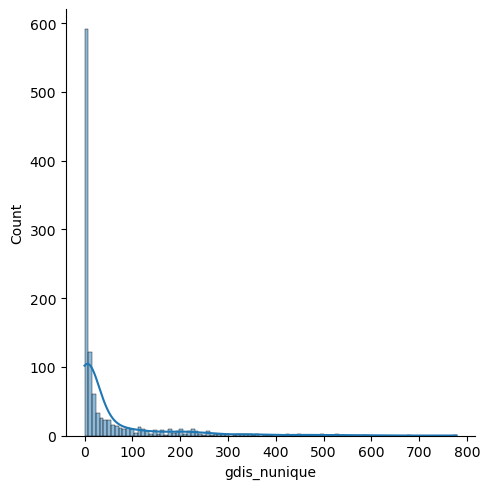

In [55]:
#example distribution plot with kernel densities
%matplotlib inline 
figure, axes = plt.subplots(2,1,figsize=(10,60))
sns.displot(data_disaster['gdis_count'],kde=True,ax=axes[0])
sns.displot(data_disaster['gdis_nunique'],kde=True,ax=axes[1])
plt.savefig('data_disaster1.png')

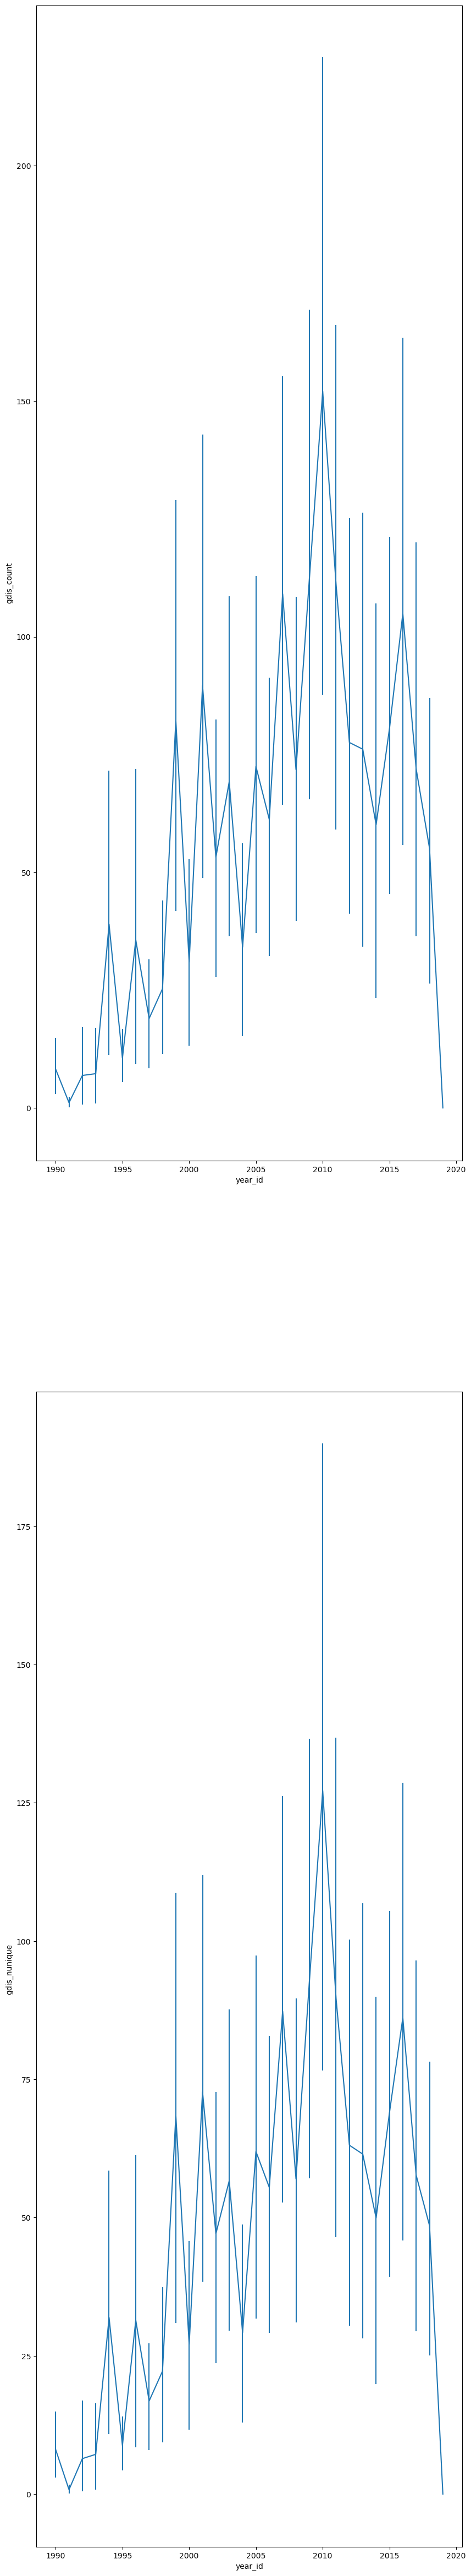

In [56]:
#create trendlines
figure, axes = plt.subplots(2,1,figsize=(10,60))

sns.lineplot(x='year_id',y='gdis_count',data=data_disaster,err_style='bars',ax=axes[0])
sns.lineplot(x='year_id',y='gdis_nunique',data=data_disaster,err_style='bars',ax=axes[1])
plt.savefig('data_disaster2.png')

In [57]:
#test for missingness
values_list = list()
cols_list = list() 
for col in data_disaster.columns:
    pct_missing= np.mean(data_disaster[col].isnull())*100
    cols_list.append(col)
    values_list.append(pct_missing)

pct_missing_df =pd.DataFrame()
pct_missing_df["col"] = cols_list
pct_missing_df["pct_missing"] = values_list
pct_missing_df

,col,pct_missing
0,iso,0.0
1,year_id,0.0
2,pg_id,0.0
3,gdis_count,0.0
4,gdis_nunique,0.0


,iso,year_id,pg_id,gdis_count,gdis_nunique,gdis_count_lag
0,AGO,1990,48689148,13.0,13.0,2.639057
1,AGO,1991,48689148,0.0,0.0,0.000000
2,AGO,1992,48689148,11.0,11.0,2.484907
3,AGO,1993,48689148,0.0,0.0,0.000000
4,AGO,1994,48689148,0.0,0.0,0.000000
...,...,...,...,...,...,...
1111,ZWE,2015,13811629,59.0,57.0,4.094345
1112,ZWE,2016,13811629,42.0,38.0,3.761200
1113,ZWE,2017,13811629,261.0,117.0,5.568345
1114,ZWE,2018,13811629,19.0,19.0,2.995732


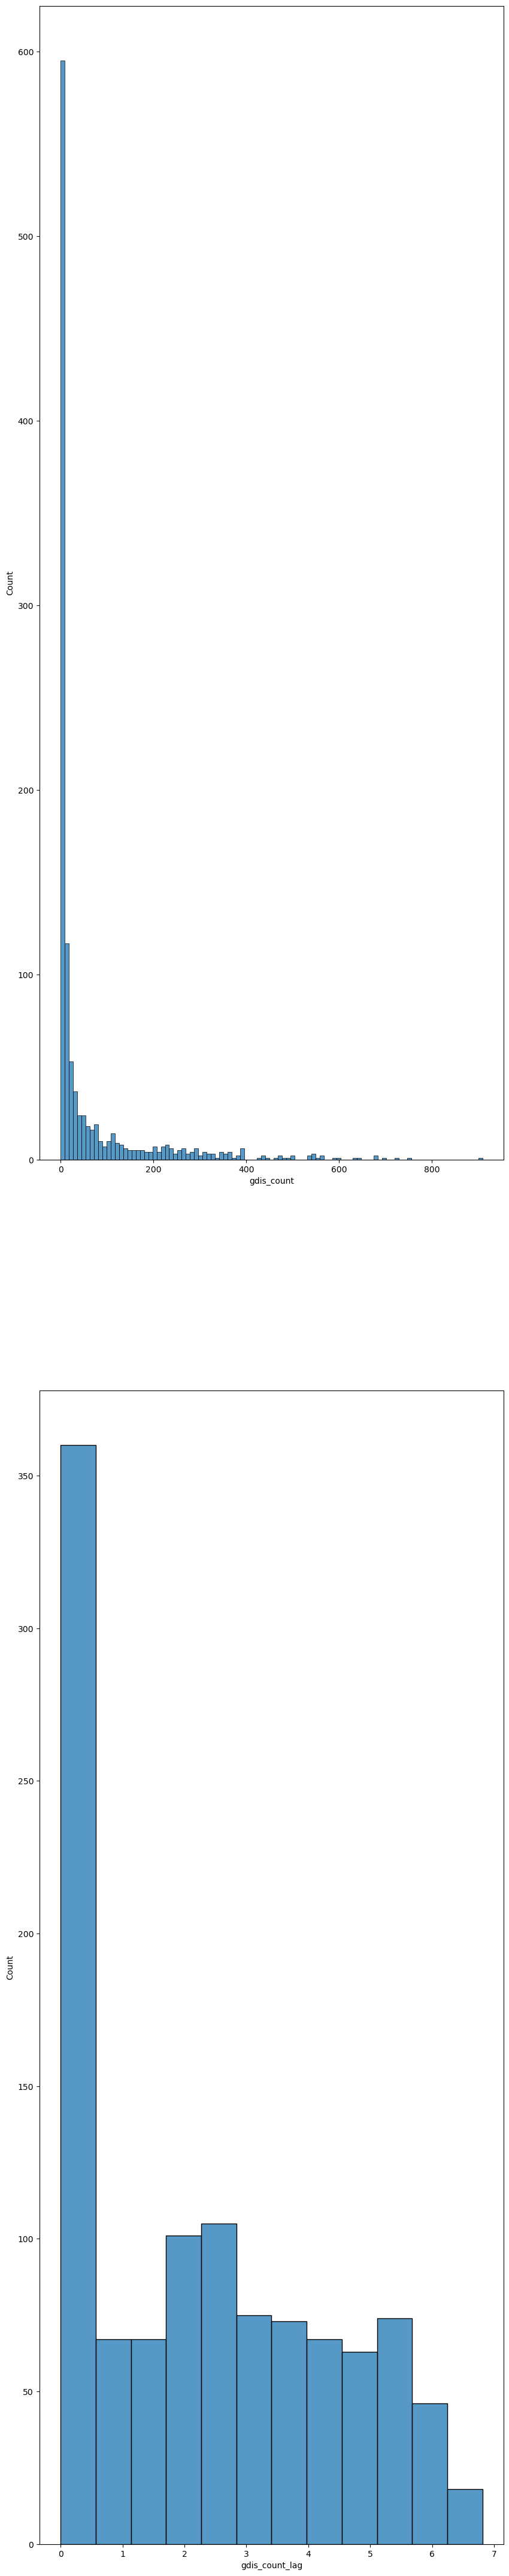

In [58]:
#logtransform the variable
data_disaster['gdis_count_lag'] = np.log1p(data_disaster['gdis_count'])
display(data_disaster)

figure, axes = plt.subplots(2,1,figsize=(10,55))
sns.histplot(data_disaster['gdis_count'],ax=axes[0])
sns.histplot(data_disaster['gdis_count_lag'],ax=axes[1])

plt.savefig('disaster_log.png')

In [59]:
data_disaster.to_csv('data_disaster.csv')

# emdat data for vulnerability

In [60]:
import openpyxl
workbook = openpyxl.load_workbook('emdat.xlsx')
import openpyxl

# Select the worksheet to work with
worksheet = workbook['emdat data']
all_cells = worksheet.rows

# Create an empty list to store the data
data = []

# Iterate through each row of cells and extract the values
for row in all_cells:
    row_data = []
    for cell in row:
        row_data.append(cell.value)
    data.append(row_data)

# Create a pandas DataFrame from the data
data_vn = pd.DataFrame(data)

# Optionally, set the column names to the first row of the worksheet
data_vn.columns = data_vn.iloc[0]
data_vn = data_vn[1:]

In [61]:
data_vn

,Dis No,Year,Seq,Glide,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,Disaster Subsubtype,Event Name,...,"Reconstruction Costs, Adjusted ('000 US$)",Insured Damages ('000 US$),"Insured Damages, Adjusted ('000 US$)",Total Damages ('000 US$),"Total Damages, Adjusted ('000 US$)",CPI,Adm Level,Admin1 Code,Admin2 Code,Geo Locations
1,1990-9579-CMR,1990,9579,None,Natural,Climatological,Drought,Drought,None,None,...,None,None,None,None,None,44.645877,None,None,None,None
2,1990-9578-BFA,1990,9578,None,Natural,Climatological,Drought,Drought,None,None,...,None,None,None,None,None,44.645877,None,None,None,None
3,1990-9604-BWA,1990,9604,None,Natural,Climatological,Drought,Drought,None,None,...,None,None,None,None,None,44.645877,None,None,None,None
4,1990-0124-CMR,1990,0124,None,Natural,Biological,Epidemic,Viral disease,None,Yellow fever,...,None,None,None,None,None,44.645877,None,None,None,None
5,1991-0169-BEN,1991,0169,None,Natural,Hydrological,Flood,Riverine flood,None,None,...,None,None,None,None,None,46.536621,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2260,2019-0623-COD,2019,0623,None,Natural,Hydrological,Landslide,Landslide,None,None,...,None,None,None,None,None,87.358007,2,None,14992,Ituri (Adm2).
2261,2019-0615-COD,2019,0615,None,Natural,Biological,Epidemic,Bacterial disease,None,Cholera,...,None,None,None,None,None,87.358007,None,None,None,None
2262,2019-0614-COD,2019,0614,EP-2019-000148,Natural,Biological,Epidemic,Viral disease,None,Measles,...,None,None,None,None,None,87.358007,None,None,None,None
2263,2019-0486-SSD,2019,0486,None,Natural,Hydrological,Flood,None,None,None,...,None,None,None,None,None,87.358007,2,None,37119,Al Mabien (Adm2).


In [62]:
data_vn.columns

Index(['Dis No', 'Year', 'Seq', 'Glide', 'Disaster Group', 'Disaster Subgroup',
       'Disaster Type', 'Disaster Subtype', 'Disaster Subsubtype',
       'Event Name', 'Country', 'ISO', 'Region', 'Continent', 'Location',
       'Origin', 'Associated Dis', 'Associated Dis2', 'OFDA Response',
       'Appeal', 'Declaration', 'AID Contribution ('000 US$)', 'Dis Mag Value',
       'Dis Mag Scale', 'Latitude', 'Longitude', 'Local Time', 'River Basin',
       'Start Year', 'Start Month', 'Start Day', 'End Year', 'End Month',
       'End Day', 'Total Deaths', 'No Injured', 'No Affected', 'No Homeless',
       'Total Affected', 'Reconstruction Costs ('000 US$)',
       'Reconstruction Costs, Adjusted ('000 US$)',
       'Insured Damages ('000 US$)', 'Insured Damages, Adjusted ('000 US$)',
       'Total Damages ('000 US$)', 'Total Damages, Adjusted ('000 US$)', 'CPI',
       'Adm Level', 'Admin1 Code', 'Admin2 Code', 'Geo Locations'],
      dtype='object', name=0)

In [63]:
data_vn['Total Deaths'] = data_vn['Total Deaths'].astype(float)
data_vn['Total Affected'] = data_vn['Total Affected'].astype(float)
data_vn['Year'] = data_vn['Year'].astype(float)

In [64]:
data_vn = data_vn.filter(['Year','ISO','Total Deaths','Total Affected'])
#rename the columns
data_vn = data_vn.rename(columns={'Year':'year_id','Total Deaths':'death_tot','Total Affected':'tot_affect'})
#fix the temporal scope
data_vn = data_vn[data_vn['year_id'] >=1990] 
data_vn = data_vn[data_vn['year_id'] <=2019] 

In [65]:
data_vn = data_vn.loc[data_vn['ISO'].isin(['AGO', 'BDI', 'BEN', 'BFA', 'BWA', 'CAF', 'CIV', 'CMR', 'COD',
       'COG', 'COM', 'CPV', 'DJI', 'ERI', 'ETH', 'GAB', 'GHA', 'GIN',
       'GMB', 'GNB', 'GNQ', 'KEN', 'LBR', 'LSO', 'MDG', 'MLI', 'MOZ',
       'MRT', 'MWI', 'NAM', 'NER', 'NGA', 'RWA', 'SDN', 'SEN', 'SLE',
       'SOM', 'SSD', 'STP', 'SWZ', 'TCD', 'TGO', 'TZA', 'UGA', 'ZAF',
       'ZMB', 'ZWE'])]
data_vn = data_vn.groupby(['ISO','year_id']).sum().reset_index()
display(data_vn)

,ISO,year_id,death_tot,tot_affect
0,AGO,1995.0,0.0,1007.0
1,AGO,1997.0,0.0,105000.0
2,AGO,1998.0,115.0,1113.0
3,AGO,1999.0,188.0,873.0
4,AGO,2000.0,77.0,79128.0
...,...,...,...,...
911,ZWE,2015.0,10.0,475.0
912,ZWE,2016.0,31.0,2000.0
913,ZWE,2017.0,251.0,7013023.0
914,ZWE,2018.0,12.0,5164.0


In [66]:
data_vn = data_vn.rename(columns={'ISO':'iso'})

In [67]:
#get descriptives
custom_describe(data_vn)

,year_id,death_tot,tot_affect
nullcounts,0.000000e+00,0.00000,0.000000e+00
sum,1.837015e+06,199588.00000,4.342978e+08
mean,2.005475e+03,217.89083,4.741242e+05
median,2.006000e+03,29.00000,2.169250e+04
max,2.019000e+03,20011.00000,2.332957e+07


/Users/NatStrom/opt/miniconda3/envs/viewser/lib/python3.9/site-packages/seaborn/distributions.py:2142: UserWarning: `displot` is a figure-level function and does not accept the ax= parameter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)
/Users/NatStrom/opt/miniconda3/envs/viewser/lib/python3.9/site-packages/seaborn/distributions.py:2142: UserWarning: `displot` is a figure-level function and does not accept the ax= parameter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)


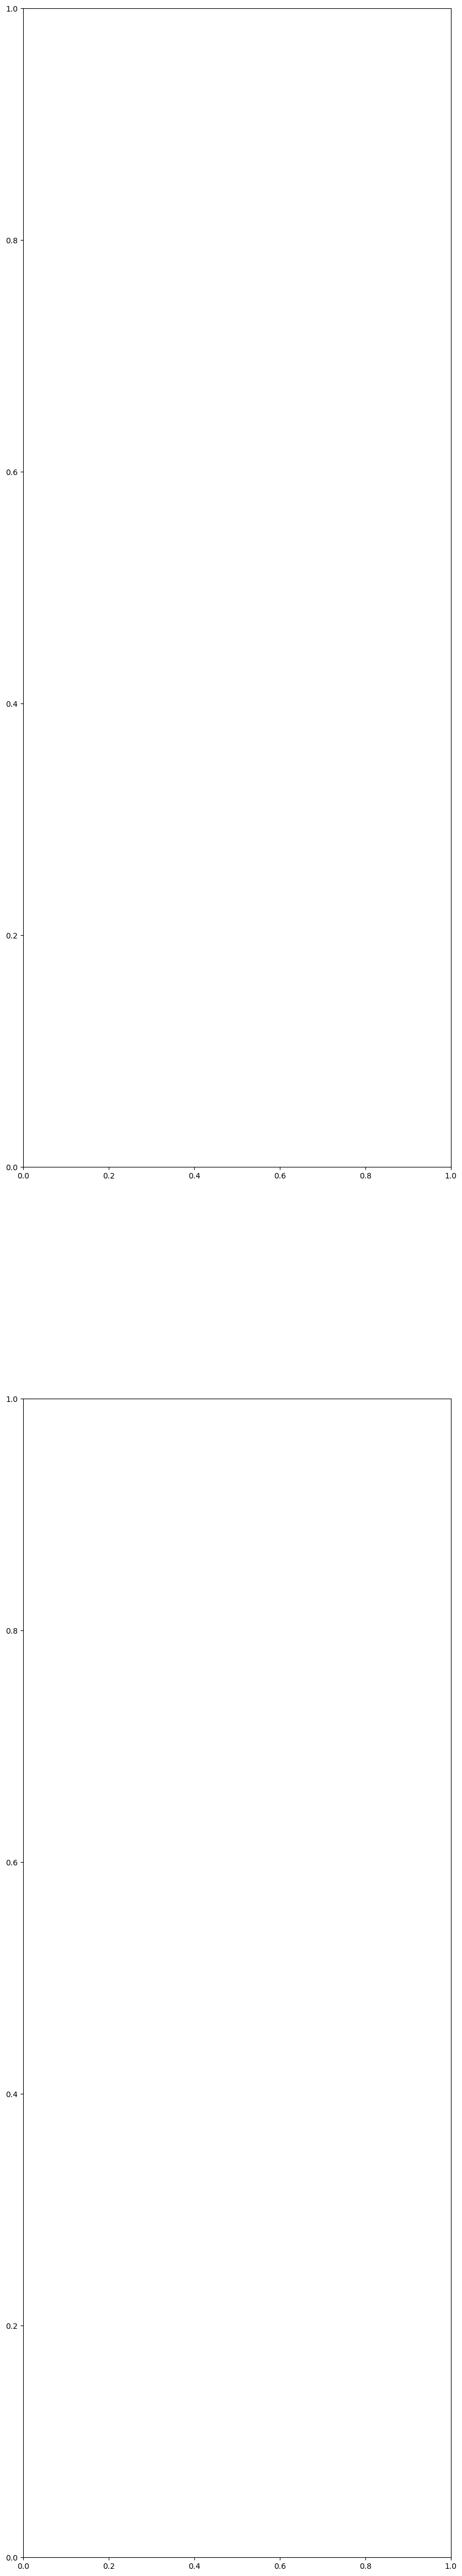

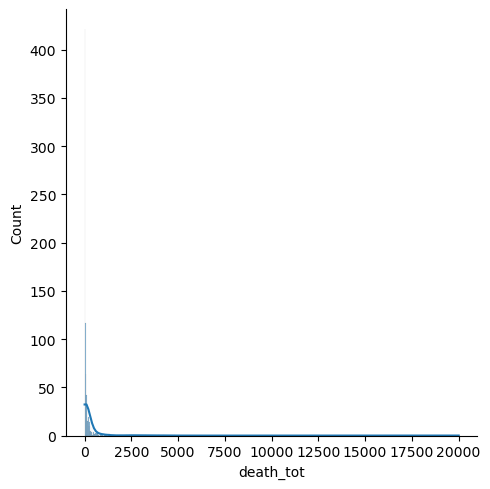

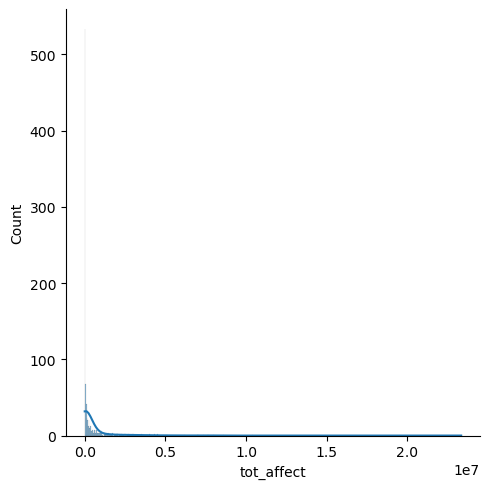

In [68]:
#example distribution plot with kernel densities
%matplotlib inline 
figure, axes = plt.subplots(2,1,figsize=(10,60))

sns.displot(data_vn['death_tot'], kde=True, ax= axes[0])
sns.displot(data_vn['tot_affect'], kde=True, ax= axes[1])
plt.savefig('emdat1.png')

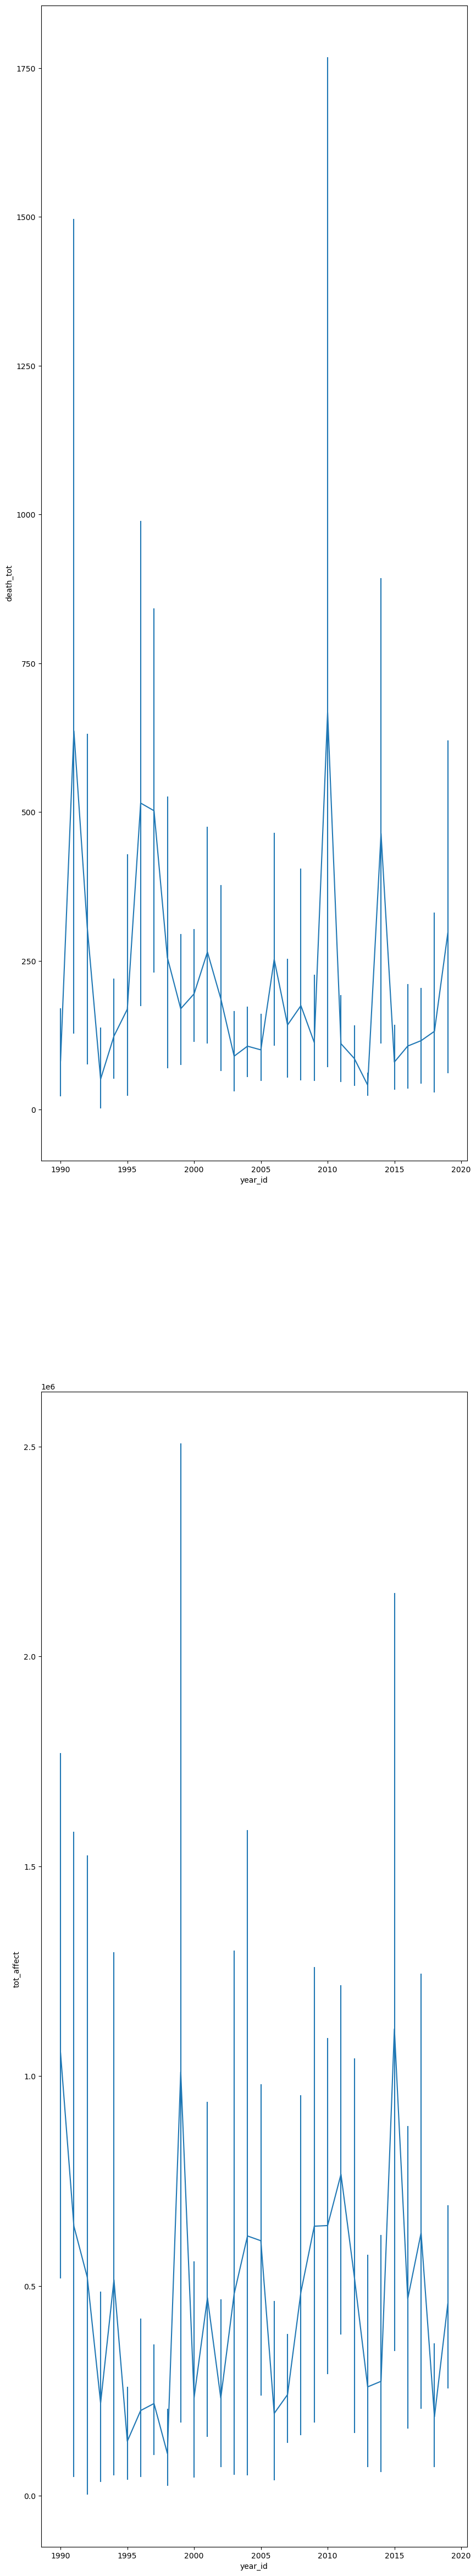

In [69]:
#create trendlines
figure, axes = plt.subplots(2,1,figsize=(10,60))

sns.lineplot(x='year_id',y='death_tot',data=data_vn,err_style='bars',ax=axes[0])
sns.lineplot(x='year_id',y='tot_affect',data=data_vn,err_style='bars',ax=axes[1])
plt.savefig('emdat2.pdf')

In [70]:
#inspect missingness
values_list = list()
cols_list = list() 
for col in data_vn.columns:
    pct_missing= np.mean(data_vn[col].isnull())*100
    cols_list.append(col)
    values_list.append(pct_missing)

pct_missing_df =pd.DataFrame()
pct_missing_df["col"] = cols_list
pct_missing_df["pct_missing"] = values_list
pct_missing_df

,col,pct_missing
0,iso,0.0
1,year_id,0.0
2,death_tot,0.0
3,tot_affect,0.0


In [71]:
data_vn.to_csv('data_vn.csv')

# 6. Universal Health Care Coverage (UHC) + health worker density

In [103]:
data_uhc = pd.read_csv('Universal Health Coverage.csv')
data_worker =pd.read_csv('Health Worker Density.csv')

In [104]:
print(data_uhc.dtypes)
print(data_uhc.columns)
print(data_uhc.describe(include='all'))
print(data_uhc.year_id.unique())

Unnamed: 0                                                           int64
year_id                                                              int64
country                                                             object
iso                                                                 object
IHME_mean_ART coverage                                             float64
                                                                    ...   
IHME_upper_Paralytic ileus and intestinal obstruction treatment    float64
IHME_upper_Stroke treatment                                        float64
IHME_upper_TB treatment                                            float64
IHME_upper_UHC effective coverage index                            float64
IHME_upper_Uterine cancer treatment                                float64
Length: 76, dtype: object
Index(['Unnamed: 0', 'year_id', 'country', 'iso', 'IHME_mean_ART coverage',
       'IHME_mean_Acute lymphoid leukaemia treatment',
       'IHME_mean_

In [105]:
print(data_worker.dtypes)
print(data_worker.columns)
print(data_worker.describe(include='all'))
print(data_worker.year_id.unique())

Unnamed: 0                                                   int64
year_id                                                      int64
country                                                     object
iso                                                         object
ihme_aides_and_emergency_med_workers_mean                  float64
                                                            ...   
ihme_ihme_phys_and_clinicalofficers_and_chws_mean_lower    float64
ihme_ihme_phys_therapists_mean_lower                       float64
ihme_ihme_psych_mean_lower                                 float64
ihme_ihme_radio_mean_lower                                 float64
ihme_ihme_trad_and_comp_practitioners_mean_lower           float64
Length: 74, dtype: object
Index(['Unnamed: 0', 'year_id', 'country', 'iso',
       'ihme_aides_and_emergency_med_workers_mean',
       'ihme_audiologists_and_counsellors_mean', 'ihme_dent_mean',
       'ihme_dent_assis_mean', 'ihme_dent_pers_mean',
       'ihme_d

In [106]:
data_worker = data_worker.filter(['ihme_healthworkers_all_mean','year_id','iso'])
data_worker
                           

,ihme_healthworkers_all_mean,year_id,iso
0,10.001,1990,AFG
1,52.959,1990,ALB
2,18.308,1990,DZA
3,83.095,1990,ASM
4,435.377,1990,AND
...,...,...,...
5995,36.320,2019,VUT
5996,79.355,2019,VNM
5997,18.365,2019,YEM
5998,48.071,2019,ZMB


In [107]:
data_worker = data_worker.loc[data_worker['iso'].isin(['COG', 'MWI', 'MDG', 'GNQ', 'AGO', 'COM', 'ETH', 'ERI', 'BWA',
       'BDI', 'CAF', 'NER', 'DJI', 'TCD', 'MRT', 'CPV', 'MOZ', 'ZMB',
       'CIV', 'GAB', 'SWZ', 'ZWE', 'BEN', 'COD', 'SOM', 'LSO', 'NAM',
       'STP', 'SSD', 'ZAF', 'UGA', 'KEN', 'NGA', 'MLI', 'SDN', 'LBR',
       'TGO', 'TZA', 'GMB', 'RWA', 'GIN', 'GHA', 'CMR', 'BFA', 'SEN',
       'SLE', 'GNB'])]
data_worker = data_worker.groupby(['iso','year_id']).sum().reset_index()
display(data_worker)

,iso,year_id,ihme_healthworkers_all_mean
0,AGO,1990,29.271
1,AGO,1991,28.972
2,AGO,1992,29.670
3,AGO,1993,29.840
4,AGO,1994,29.909
...,...,...,...
1405,ZWE,2015,43.979
1406,ZWE,2016,44.146
1407,ZWE,2017,45.486
1408,ZWE,2018,46.874


In [108]:
## only years from 1990 onwards
data_worker = data_worker.loc[data_uhc['year_id'] >= 1990]

In [110]:
#test for missingness
#getting the % of missing values in each column
values_list = list()
cols_list = list() #creating empty lists

for col in data_worker.columns:
    pct_missing= np.mean(data_worker[col].isnull())*100
    cols_list.append(col)
    values_list.append(pct_missing)

pct_missing_df =pd.DataFrame()
pct_missing_df["col"] = cols_list
pct_missing_df["pct_missing"] = values_list
pct_missing_df

,col,pct_missing
0,iso,0.0
1,year_id,0.0
2,ihme_healthworkers_all_mean,0.0


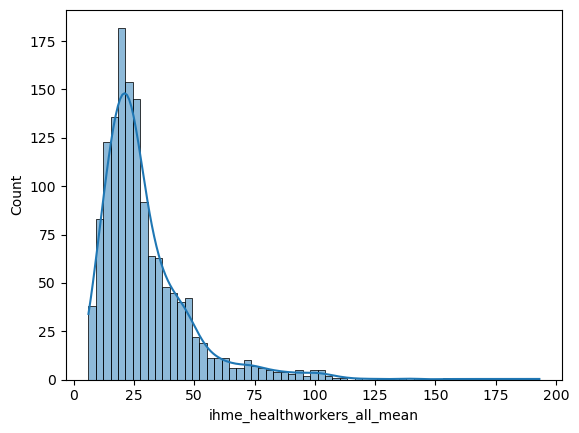

In [112]:
#get a histogram
sns.histplot(data_worker['ihme_healthworkers_all_mean'],kde=True)


plt.savefig('healthworker1.png')

In [113]:
data_worker.year_id.unique()

array([1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
       2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019])

In [ ]:
#prob need to log the variable

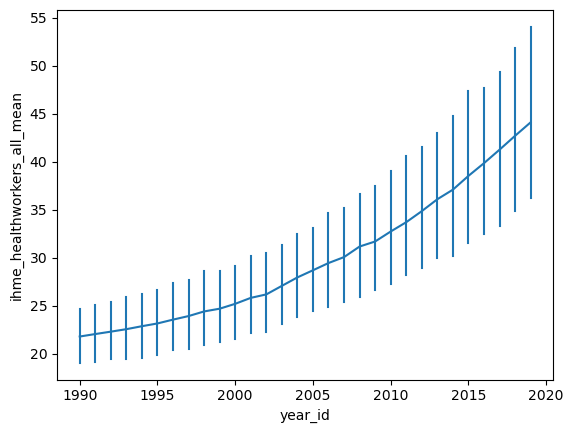

In [114]:
#create trendlines


sns.lineplot(x='year_id',y='ihme_healthworkers_all_mean',data=data_worker,err_style='bars')
plt.savefig('healthworker2.png')

In [115]:
#save to csv
data_worker.to_csv('data_hwd.csv')

In [ ]:
# so the uhc is only reported every 5 years o so and has a lot of missingness – i will impute the data so its a panel from 2000 to 2019 at least

In [83]:
data_disaster = pd.read_csv('data_disaster.csv')
data_disaster

,Unnamed: 0,iso,year_id,pg_id,gdis_count,gdis_nunique,gdis_count_lag
0,0,AGO,1990,48689148,13.0,13.0,2.639057
1,1,AGO,1991,48689148,0.0,0.0,0.000000
2,2,AGO,1992,48689148,11.0,11.0,2.484907
3,3,AGO,1993,48689148,0.0,0.0,0.000000
4,4,AGO,1994,48689148,0.0,0.0,0.000000
...,...,...,...,...,...,...,...
1111,1111,ZWE,2015,13811629,59.0,57.0,4.094345
1112,1112,ZWE,2016,13811629,42.0,38.0,3.761200
1113,1113,ZWE,2017,13811629,261.0,117.0,5.568345
1114,1114,ZWE,2018,13811629,19.0,19.0,2.995732


In [92]:
display(custom_describe(data_dah))
display(custom_describe(data_uhc))

,year_id,ihme_dah_total_aid,dah_total_log
nullcounts,0.000000e+00,0.000000e+00,0.000000
sum,2.482904e+06,1.505554e+08,13086.139286
mean,2.003958e+03,1.215136e+05,10.561856
median,2.004000e+03,4.088000e+04,10.618396
max,2.018000e+03,1.577709e+06,14.271484


,year_id,Unnamed: 0,uhc_index,uhc_available_score
nullcounts,0.0,0.000000,0.000000,0.000000
sum,518838.0,162069.000000,9744.544070,9744.544070
mean,2011.0,628.174419,37.769551,37.769551
median,2012.5,644.500000,37.840400,37.840400
max,2019.0,1253.000000,69.405770,69.405770


In [ ]:
custom_describe(data_wdi)

In [93]:
display(custom_describe(data_wash))
display(custom_describe(data_disaster))
display(custom_describe(data_vn))

,year_id,access_drinkwater_index,access_sani_index,log_access_drinkwater_index,log_access_sani_index
nullcounts,0.0,0.000000,0.000000,0.000000,0.000000
sum,2244385.0,8068.379928,8226.389499,1217.500624,1326.074589
mean,2007.5,7.216798,7.358130,1.088999,1.186113
median,2007.5,0.000000,0.000000,0.000000,0.000000
max,2020.0,45.896896,47.621688,3.847951,3.884070


,Unnamed: 0.1,Unnamed: 0,year_id,gdis_count,gdis_nunique,gdis_count_lag
nullcounts,0.0,0.0,0.000000e+00,0.000000,0.000000,0.000000
sum,516636.0,516636.0,2.038617e+06,52685.000000,43382.000000,2150.566975
mean,508.0,508.0,2.004540e+03,51.804326,42.656834,2.114618
median,508.0,508.0,2.005000e+03,6.000000,5.000000,1.945910
max,1016.0,1016.0,2.019000e+03,909.000000,778.000000,6.813445


,year_id,death_tot,tot_affect
nullcounts,0.000000e+00,0.000000,0.000000e+00
sum,1.650510e+06,163862.000000,3.882513e+08
mean,2.005480e+03,199.103281,4.717513e+05
median,2.006000e+03,25.000000,2.029700e+04
max,2.019000e+03,20011.000000,2.332957e+07
